## Loading Library and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/UOS COMP/train.csv")

In [4]:
data.tail()

일시    광진구   동대문구    성동구    중랑구
1456  20211227  3.830  3.416  2.908  2.350
1457  20211228  4.510  3.890  3.714  2.700
1458  20211229  4.490  3.524  3.660  2.524
1459  20211230  4.444  3.574  3.530  2.506
1460  20211231  3.616  3.210  2.620  2.146

##지하철 데이터처리

지하철 데이터 링크: https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

서울시 열린 데이터 광장에서 '서울시 지하철호선별 역별 승하차 인원 정보' 데이터를 시각화해보았습니다.


지하철 데이터를 다운로드 받은 후, 각 년도별로 지하철 2018년, 지하철 2019년, 지하철 2020년, 지하철 2021년 폴더에 데이터를 넣었습니다.

### 지하철 데이터 모으기

In [5]:
import glob

In [6]:
subway_list_2018 = sorted(glob.glob('/content/drive/MyDrive/UOS COMP/지하철 2018년/*.csv'))
subway_list_2019 = sorted(glob.glob('/content/drive/MyDrive/UOS COMP/지하철 2019년/*.csv'))
subway_list_2020 = sorted(glob.glob('/content/drive/MyDrive/UOS COMP/지하철 2020년/*.csv'))
subway_list_2021 = sorted(glob.glob('/content/drive/MyDrive/UOS COMP/지하철 2021년/*.csv'))

In [7]:
subway_list_2018[-5:]

['/content/drive/MyDrive/UOS COMP/지하철 2018년/CARD_SUBWAY_MONTH_201808.csv',
 '/content/drive/MyDrive/UOS COMP/지하철 2018년/CARD_SUBWAY_MONTH_201809.csv',
 '/content/drive/MyDrive/UOS COMP/지하철 2018년/CARD_SUBWAY_MONTH_201810.csv',
 '/content/drive/MyDrive/UOS COMP/지하철 2018년/CARD_SUBWAY_MONTH_201811.csv',
 '/content/drive/MyDrive/UOS COMP/지하철 2018년/CARD_SUBWAY_MONTH_201812.csv']

In [8]:
pd.read_csv(subway_list_2018[0], encoding='euc-kr')

사용일자    노선명          역명   승차총승객수   하차총승객수      등록일자
0      20180101    1호선         서울역  40213.0  34505.0  20180104
1      20180101  우이신설선         신설동    699.0    809.0  20180104
2      20180101  우이신설선          보문    754.0    803.0  20180104
3      20180101  우이신설선  성신여대입구(돈암)   2228.0   2276.0  20180104
4      20180101  우이신설선          정릉   1844.0   1685.0  20180104
...         ...    ...         ...      ...      ...       ...
18003  20180131  우이신설선          솔샘   5850.0   5493.0  20180203
18004  20180131  우이신설선      북한산보국문   6036.0   5552.0  20180203
18005  20180131  우이신설선          정릉   4210.0   3884.0  20180203
18006  20180131  우이신설선  성신여대입구(돈암)   4042.0   3926.0  20180203
18007  20180131  우이신설선          보문   1421.0   1620.0  20180203

[18008 rows x 6 columns]

In [9]:
#순서와 encoding방식의 차이로 인해 함수 사용 불가(2018과 2019는 동일하나, 2020과 2021은 차이가 있음).

subway_2018 = pd.read_csv(subway_list_2018[0], encoding='euc-kr')
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[1], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[2], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[3], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[4], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[5], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[6], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[7], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[8], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[9], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[10], encoding ='euc-kr'))
subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[11], encoding ='euc-kr'))

<ipython-input-9-5281ee196df0>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[1], encoding ='euc-kr'))
<ipython-input-9-5281ee196df0>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[2], encoding ='euc-kr'))
<ipython-input-9-5281ee196df0>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[3], encoding ='euc-kr'))
<ipython-input-9-5281ee196df0>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2018 = subway_2018.append(pd.read_csv(subway_list_2018[4

In [10]:
subway_2019 = pd.read_csv(subway_list_2019[0], encoding='euc-kr')
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[1], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[2], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[3], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[4], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[5], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[6], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[7], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[8], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[9], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[10], encoding ='euc-kr'))
subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[11], encoding ='euc-kr'))

<ipython-input-10-8cb56a2afeea>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[1], encoding ='euc-kr'))
<ipython-input-10-8cb56a2afeea>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[2], encoding ='euc-kr'))
<ipython-input-10-8cb56a2afeea>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2019 = subway_2019.append(pd.read_csv(subway_list_2019[3], encoding ='euc-kr'))
<ipython-input-10-8cb56a2afeea>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2019 = subway_2019.append(pd.read_csv(subway_list_20

In [11]:
year_20 = [4, 5, 6, 7, 9, 10, 11]
datas_20 = []

for i in year_20:
  tmp = pd.read_csv(subway_list_2020[i])
  tmp.reset_index(drop = False, inplace = True)
  tmp.drop(['등록일자'], axis = 1, inplace = True)
  datas_20.append(tmp)

inst = pd.read_csv(subway_list_2020[8], encoding ='euc-kr')
inst.reset_index(drop = False, inplace = True)
inst.drop(['등록일자'], axis = 1, inplace = True)
datas_20.append(inst)
datas_20[7]

index 사용일자        노선명     역명  승차총승객수    하차총승객수
0      20200901  일산선         주엽   6123    6290  20200904
1      20200901  일산선         대화  10034    7923  20200904
2      20200901  장항선         봉명    802     794  20200904
3      20200901  장항선   쌍용(나사렛대)   1335    1189  20200904
4      20200901  중앙선         아신    382     387  20200904
...         ...  ...        ...    ...     ...       ...
17877  20200930  2호선       건대입구  17739   18062  20201003
17878  20200930  2호선         성수   6972    7561  20201003
17879  20200930  2호선         뚝섬   5557    5493  20201003
17880  20200930  2호선        한양대   1870    1505  20201003
17881  20200930  2호선  왕십리(성동구청)   6817    5052  20201003

[17882 rows x 6 columns]

In [12]:
for i in range(0, len(datas_20)):
  datas_20[i] = datas_20[i].rename(columns={'index':'사용일자', '사용일자':'노선명', '노선명':'역명', '역명':'승차총승객수', '승차총승객수':'하차총승객수', '하차총승객수':'등록일자'})


In [13]:
subway_2020 = pd.read_csv(subway_list_2020[0], encoding='euc-kr')
subway_2020 = subway_2020.append(pd.read_csv(subway_list_2020[1], encoding ='euc-kr'))
subway_2020 = subway_2020.append(pd.read_csv(subway_list_2020[2], encoding ='euc-kr'))
subway_2020 = subway_2020.append(pd.read_csv(subway_list_2020[3], encoding ='euc-kr'))
subway_2020 = subway_2020.append(datas_20[0])
subway_2020 = subway_2020.append(datas_20[1])
subway_2020 = subway_2020.append(datas_20[2])
subway_2020 = subway_2020.append(datas_20[3])
subway_2020 = subway_2020.append(datas_20[7]) #7이 맞음.
subway_2020 = subway_2020.append(datas_20[4])
subway_2020 = subway_2020.append(datas_20[5])
subway_2020 = subway_2020.append(datas_20[6])

<ipython-input-13-35d354a5e14d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2020 = subway_2020.append(pd.read_csv(subway_list_2020[1], encoding ='euc-kr'))
<ipython-input-13-35d354a5e14d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2020 = subway_2020.append(pd.read_csv(subway_list_2020[2], encoding ='euc-kr'))
<ipython-input-13-35d354a5e14d>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2020 = subway_2020.append(pd.read_csv(subway_list_2020[3], encoding ='euc-kr'))
<ipython-input-13-35d354a5e14d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2020 = subway_2020.append(datas_20[0])
<ipython-inpu

In [14]:
year_21 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
datas_21 = []

for i in year_21:
  tmp = pd.read_csv(subway_list_2021[i])
  tmp.reset_index(drop = False, inplace = True)
  tmp.drop(['등록일자'], axis = 1, inplace = True)
  tmp.rename(columns={'index':'사용일자', '사용일자':'노선명', '노선명':'역명', '역명':'승차총승객수', '승차총승객수':'하차총승객수', '하차총승객수':'등록일자'})
  datas_21.append(tmp)

In [15]:
for i in range(0, len(datas_21)):
  datas_21[i] = datas_21[i].rename(columns={'index':'사용일자', '사용일자':'노선명', '노선명':'역명', '역명':'승차총승객수', '승차총승객수':'하차총승객수', '하차총승객수':'등록일자'})


In [16]:
subway_2021 = datas_21[0]
subway_2021 =subway_2021.append(datas_21[1])
subway_2021 =subway_2021.append(datas_21[2])
subway_2021 =subway_2021.append(datas_21[3])
subway_2021 =subway_2021.append(datas_21[4])
subway_2021 =subway_2021.append(datas_21[5])
subway_2021 =subway_2021.append(datas_21[6])
subway_2021 =subway_2021.append(datas_21[7])
subway_2021 =subway_2021.append(datas_21[8])
subway_2021 =subway_2021.append(datas_21[9])
subway_2021 =subway_2021.append(pd.read_csv(subway_list_2021[10], encoding ='euc-kr'))
subway_2021 =subway_2021.append(datas_21[10])

<ipython-input-16-f1c49c4ef70f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2021 =subway_2021.append(datas_21[1])
<ipython-input-16-f1c49c4ef70f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2021 =subway_2021.append(datas_21[2])
<ipython-input-16-f1c49c4ef70f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2021 =subway_2021.append(datas_21[3])
<ipython-input-16-f1c49c4ef70f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subway_2021 =subway_2021.append(datas_21[4])
<ipython-input-16-f1c49c4ef70f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [17]:
data_subway = subway_2018
data_subway = data_subway.append(subway_2019)
data_subway = data_subway.append(subway_2020)
data_subway = data_subway.append(subway_2021)

<ipython-input-17-95d2a68a998a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_subway = data_subway.append(subway_2019)
<ipython-input-17-95d2a68a998a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_subway = data_subway.append(subway_2020)
<ipython-input-17-95d2a68a998a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_subway = data_subway.append(subway_2021)


In [18]:
data_subway.to_csv('all_data_subway.csv')

### 지하철 데이터 구별로 나누기

예측을 행정구별로 다르게 진행할 것이기 때문에 지하철 데이터도 행정구별로 나누었습니다.

지하철역 승하차 승객 수 데이터에는 2개 이상의 노선이 지나가는 역의 경우 노선별로 승하차수의 데이터가 있었습니다. 그래서 같은 역의 모든 노선에서의 승하차수를 더해서 하나의 값으로 만들어주었습니다.

In [19]:
#stations that only run one line and stations that run multiple lines are processed differently
#one_lines is a function for stations that only run a line
def one_lines(data, stations):
    trains = data[data['역명'] == stations[0]]
    trains.reset_index(drop=False, inplace=True)
    trains = trains[['사용일자', '하차총승객수']]
    trains.rename(columns={'하차총승객수': stations[0]}, inplace = True)

    for station in stations[1:]:
        new_trains = data[data['역명'] == station]
        new_trains.reset_index(drop = False, inplace = True)
        new_trains = new_trains[['사용일자', '하차총승객수']]
        new_trains.rename(columns={'하차총승객수': station}, inplace=True)
        trains = pd.merge(trains, new_trains, how='outer', on='사용일자')

    return trains


In [20]:
#stations that only run one line and stations that run multiple lines are processed differently
#mul_lines is a function for stations that run multiple lines
def mul_lines(data, stations, lines, data_region):
    '''
    data: original input data
    station: name of the stations
    lines: lines that are running through the station
    data_out: data of the region
    ---
    return data_out
    '''

    for idx, station in enumerate(stations):
        multi_station = data[['사용일자', '노선명', '역명', '하차총승객수']]
        line_added = None
        for num, line in enumerate(lines[idx]):
            mul_st = multi_station.copy()
            line = mul_st[mul_st['노선명'] == line]
            line_station = line[line['역명'] == station]
            line_station.reset_index(drop = False, inplace = True)
            line_station = line_station[['사용일자', '하차총승객수']]
            line_station.rename(columns={"하차총승객수": station }, inplace = True)

            if num == 0:
                line_added = line_station[[station]]
            else:
                line_added += line_station[[station]]

        data_region[station] = line_added

    return data_region

In [21]:
#a function to add all the stations' number
def add_stations(train_data):
    names = list(train_data.columns)
    total_trains = train_data[[names[0], names[1]]]
    total_trains.rename(columns={names[1]:'총하차인원'}, inplace=True)
    for i in names[2:]:
        added = train_data[[i]]
        added.rename(columns = {i:'총하차인원'}, inplace=True)
        total_trains = total_trains + added
    total_trains[['사용일자']] = train_data[['사용일자']]

    return total_trains

In [22]:
data = pd.read_csv('/content/drive/MyDrive/UOS COMP/지하철/all_data_subway.csv')

<ipython-input-22-dad9dfd824f2>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/UOS COMP/지하철/all_data_subway.csv')


In [23]:
all_trains = data[['사용일자', '역명', '하차총승객수']]

In [24]:
all_trains

사용일자              역명   하차총승객수
0       20180101             서울역  34505.0
1       20180101             신설동    809.0
2       20180101              보문    803.0
3       20180101      성신여대입구(돈암)   2276.0
4       20180101              정릉   1685.0
...          ...             ...      ...
864847  20211231        월곡(동덕여대)   9924.0
864848  20211231  상월곡(한국과학기술연구원)   4842.0
864849  20211231             돌곶이   7811.0
864850  20211231              석계  11335.0
864851  20211231            태릉입구   5290.0

[864852 rows x 3 columns]

####광진구

In [25]:
#gwangjin = one_line_stations
gwangjin = ['아차산(어린이대공원후문)', '광나루(장신대)', '중곡']
gwangjin_trains = one_lines(all_trains, gwangjin)

#gwangjin - multiple_lines_stations
gwangjin_trains = mul_lines(data, ['건대입구', '군자(능동)'], [['2호선', '7호선'], ['5호선', '7호선']], gwangjin_trains)

In [26]:
gwangjin_trains[:5]

사용일자  아차산(어린이대공원후문)  광나루(장신대)       중곡     건대입구   군자(능동)
0  20180101        10671.0    7107.0   4587.0  40249.0  11506.0
1  20180102        14407.0   13593.0  10181.0  63827.0  24446.0
2  20180103        14721.0   13560.0  10472.0  65454.0  25251.0
3  20180104        14646.0   13496.0  10460.0  66481.0  25052.0
4  20180105        14733.0   13758.0  10314.0  74824.0  26560.0

In [27]:
#모든 역 합친 값 구하기
gwangjin_total_trains = add_stations(gwangjin_trains)

<ipython-input-21-bf413dd7d64b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_trains.rename(columns={names[1]:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added.rename(columns = {i:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added.rename(columns = {i:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8:

In [28]:
gwangjin_total_trains

사용일자     총하차인원
0     20180101   74120.0
1     20180102  126454.0
2     20180103  129458.0
3     20180104  130135.0
4     20180105  140189.0
...        ...       ...
1455  20211227  100400.0
1456  20211228  105698.0
1457  20211229  108832.0
1458  20211230  114747.0
1459  20211231  103482.0

[1460 rows x 2 columns]

####동대문구

In [29]:
#dongdae - one_line_stations
dongdae = ['제기동', '외대앞', '신이문', '고려대(종암)', '답십리', '장한평', '회기']
dongdae_trains = one_lines(all_trains, dongdae)

#dongdae - multiple stations
dongdae_trains = mul_lines(data, ['신설동', '청량리(서울시립대입구)'], [['1호선', '2호선', '우이신설선'], ['1호선', '경원선']], dongdae_trains)
dongdae_trains = dongdae_trains.drop(1460, axis=0)

In [30]:
dongdae_trains

사용일자      제기동      외대앞     신이문  고려대(종암)      답십리      장한평       회기  \
0     20180101  10559.0   6251.0  4538.0   3911.0   6905.0   6868.0  16198.0   
1     20180102  21256.0  11371.0  9170.0   9121.0  16142.0  19965.0  27793.0   
2     20180103  20903.0  11568.0  9081.0   9256.0  16905.0  21463.0  28782.0   
3     20180104  20988.0  11279.0  9124.0   9189.0  16514.0  21331.0  27843.0   
4     20180105  22359.0  11784.0  9191.0   9272.0  17079.0  22195.0  28429.0   
...        ...      ...      ...     ...      ...      ...      ...      ...   
1455  20211227  14206.0   6709.0  7182.0   6795.0  13972.0  17048.0  21194.0   
1456  20211228  16779.0   6761.0  7334.0   7070.0  14427.0  17741.0  22004.0   
1457  20211229  17686.0   6889.0  7693.0   7193.0  14853.0  18560.0  22196.0   
1458  20211230  17083.0   6775.0  7570.0   7022.0  14064.0  18189.0  21715.0   
1459  20211231  15304.0   6517.0  7094.0   6379.0  13487.0  16709.0  19894.0   

          신설동  청량리(서울시립대입구)  
0      9896.0       28209.0  
1     22539.0       44699.0  
2     22529.0       44181.0  
3     22575.0       44726.0  
4     24307.0       49976.0  
...       ...           ...  
1455  15981.0       30192.0  
1456  17442.0       32760.0  
1457  18057.0       34158.0  
1458  17876.0       34669.0  
1459  16574.0       36032.0  

[1460 rows x 10 columns]

In [31]:
#모든 역 합친 값 구하기
dongdae_total_trains = add_stations(dongdae_trains)

<ipython-input-21-bf413dd7d64b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_trains.rename(columns={names[1]:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added.rename(columns = {i:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added.rename(columns = {i:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8:

In [32]:
dongdae_total_trains

사용일자     총하차인원
0     20180101   93335.0
1     20180102  182056.0
2     20180103  184668.0
3     20180104  183569.0
4     20180105  194592.0
...        ...       ...
1455  20211227  133279.0
1456  20211228  142318.0
1457  20211229  147285.0
1458  20211230  144963.0
1459  20211231  137990.0

[1460 rows x 2 columns]

#### 성동구

In [33]:
#sungdong - one_line_stations
sung = ['신답', '용답', '성수', '뚝섬', '한양대', '상왕십리', '장한평', '답십리', '행당', '신금호', '금호', '응봉', '서울숲']
sung_trains = one_lines(all_trains, sung)

#sungdong - multiple_lines_stations
sung_trains = mul_lines(data, ['왕십리(성동구청)', '옥수'], [['2호선', '경원선', '5호선'], ['경원선', '3호선']], sung_trains)
sung_trains = sung_trains.drop(1460, axis=0)

In [34]:
sung_trains.head(5)

사용일자      신답      용답       성수       뚝섬      한양대     상왕십리      장한평  \
0  20180101   639.0  1640.0   8098.0   5262.0   2824.0   5910.0   6868.0   
1  20180102  1752.0  2699.0  33975.0  19896.0  10126.0  14337.0  19965.0   
2  20180103  1717.0  2638.0  35182.0  20493.0  10500.0  14682.0  21463.0   
3  20180104  1710.0  2669.0  35027.0  20619.0  10622.0  14720.0  21331.0   
4  20180105  1834.0  2667.0  36052.0  21088.0  10766.0  14955.0  22195.0   

       답십리      행당     신금호      금호      응봉     서울숲  왕십리(성동구청)       옥수  
0   6905.0  3259.0  2686.0  3804.0  1071.0  2486.0    23512.0   4795.0  
1  16142.0  8239.0  6387.0  8739.0  1713.0  7652.0    40439.0  10983.0  
2  16905.0  8665.0  6591.0  8731.0  1655.0  7885.0    42078.0  11146.0  
3  16514.0  8555.0  6456.0  8835.0  1720.0  7912.0    41942.0  11182.0  
4  17079.0  8481.0  6662.0  9101.0  1720.0  8027.0    45574.0  11561.0

In [35]:
#모든 역 합친 값 구하기
sung_total_trains = add_stations(sung_trains)

<ipython-input-21-bf413dd7d64b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_trains.rename(columns={names[1]:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added.rename(columns = {i:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added.rename(columns = {i:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8:

In [36]:
sung_total_trains

사용일자     총하차인원
0     20180101   79759.0
1     20180102  203044.0
2     20180103  210331.0
3     20180104  209814.0
4     20180105  217762.0
...        ...       ...
1455  20211227  182597.0
1456  20211228  192718.0
1457  20211229  198498.0
1458  20211230  193716.0
1459  20211231  173590.0

[1460 rows x 2 columns]

#### 중랑구

In [37]:
#jungrang - one_line_stations
jung = ['화랑대(서울여대입구)', '봉화산(서울의료원)', '먹골', '중화', '면목', '사가정', '중랑', '망우', '양원'] #용마산은 Nan으로 인해 제거함. 봉화산 6호선도 Nan으로 인해 경춘만 살려둠.
jung_trains = one_lines(all_trains, jung)

#jungrang - multiple_lines_stations
#신내의 경우 6호선이 2018년 이후에 신설되었으며, 1~2명만 하차하여 영향이 미미할 것으로 보여 제외시켰다.
jung_trains = mul_lines(data, ['태릉입구', '신내', '상봉(시외버스터미널)'], [['6호선', '7호선'], ['경춘선'], ['중앙선', '7호선']], jung_trains)
jung_trains = jung_trains.drop(1460, axis=0)

In [38]:
jung_trains

사용일자  화랑대(서울여대입구)  봉화산(서울의료원)       먹골       중화       면목      사가정  \
0     20180101       4235.0      3896.0   4810.0   5032.0   7362.0   7791.0   
1     20180102      10247.0      9539.0  10948.0  11443.0  15704.0  16496.0   
2     20180103      10436.0      9726.0  11211.0  11703.0  15959.0  16600.0   
3     20180104      10710.0      9819.0  11272.0  11621.0  15939.0  16747.0   
4     20180105      10681.0      9927.0  11500.0  11857.0  16146.0  17402.0   
...        ...          ...         ...      ...      ...      ...      ...   
1455  20211227       8257.0      7606.0   9246.0  10140.0  14080.0  14876.0   
1456  20211228       8706.0      8156.0   9608.0  10558.0  14607.0  15430.0   
1457  20211229       8893.0      8172.0   9810.0  10664.0  14912.0  15690.0   
1458  20211230       8592.0      7811.0   9709.0  10323.0  14584.0  15637.0   
1459  20211231       7913.0      7378.0   9213.0   9641.0  14023.0  14924.0   

          중랑      망우      양원     태릉입구      신내  상봉(시외버스터미널)  
0     3256.0  4303.0   699.0   6345.0   351.0      11569.0  
1     5909.0  8271.0  1688.0  14159.0   740.0      22890.0  
2     6046.0  8203.0  1730.0  14494.0   760.0      23536.0  
3     6002.0  8198.0  1653.0  14984.0   721.0      23428.0  
4     6302.0  8848.0  1731.0  15047.0   743.0      24742.0  
...      ...     ...     ...      ...     ...          ...  
1455  4719.0  6674.0  1953.0  12529.0  1770.0      17424.0  
1456  5047.0  7119.0  2039.0  13097.0  1876.0      20613.0  
1457  5141.0  7459.0  2182.0  13328.0  1964.0      21571.0  
1458  5044.0  7473.0  2032.0  13328.0  1823.0      21638.0  
1459  4851.0  6982.0  1750.0  12305.0  1705.0      20424.0  

[1460 rows x 13 columns]

In [39]:
#모든 역 합친 값 구하기
jung_total_trains = add_stations(jung_trains)

<ipython-input-21-bf413dd7d64b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_trains.rename(columns={names[1]:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added.rename(columns = {i:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  added.rename(columns = {i:'총하차인원'}, inplace=True)
<ipython-input-21-bf413dd7d64b>:8:

#### 2021년 11월 22일 데이터 추가

지하철 데이터에는 2021년 11월 22일 데이터가 없다.
그래서 0.0으로 해당 데이터를 대체했다.

In [40]:
new_row = pd.DataFrame([[20211122, 0.0]], columns = gwangjin_total_trains.columns)
gwangjin_total_trains = pd.concat([gwangjin_total_trains.iloc[:1421], new_row, gwangjin_total_trains.iloc[1421:]], ignore_index = True)

In [41]:
new_row = pd.DataFrame([[20211122, 0.0]], columns = dongdae_total_trains.columns)
dongdae_total_trains = pd.concat([dongdae_total_trains.iloc[:1421], new_row, dongdae_total_trains.iloc[1421:]], ignore_index = True)

In [42]:
new_row = pd.DataFrame([[20211122, 0.0]], columns = sung_total_trains.columns)
sung_total_trains = pd.concat([sung_total_trains.iloc[:1421], new_row, sung_total_trains.iloc[1421:]], ignore_index = True)

In [43]:
new_row = pd.DataFrame([[20211122, 0.0]], columns = jung_total_trains.columns)
jung_total_trains = pd.concat([jung_total_trains.iloc[:1421], new_row, jung_total_trains.iloc[1421:]], ignore_index = True)

### 데이터 다운로드

In [44]:
gwangjin_total_trains.to_csv('gwangjin_total_trains.csv')
dongdae_total_trains.to_csv('dongdae_total_trains.csv')
sung_total_trains.to_csv('sung_total_trains.csv')
jung_total_trains.to_csv('jung_total_trains.csv')

## 시각화

In [45]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import math

jung_data = pd.read_csv('/content/drive/MyDrive/UOS COMP/지하철/jung_total_trains.csv')[["사용일자", "총하차인원"]]
sung_data = pd.read_csv('/content/drive/MyDrive/UOS COMP/지하철/sung_total_trains.csv')[["사용일자", "총하차인원"]]
gwang_data = pd.read_csv('/content/drive/MyDrive/UOS COMP/지하철/gwangjin_total_trains.csv')[["사용일자", "총하차인원"]]
dong_data = pd.read_csv('/content/drive/MyDrive/UOS COMP/지하철/dongdae_total_trains.csv')[["사용일자", "총하차인원"]]

In [46]:
def my_dates(x):
  st_date = str(x)
  new = st_date[0:4] + '-' + st_date[4:6] + '-' + st_date[6:]
  return new

In [47]:
def show_chart(data):
    new_data = data.rename(columns = {'사용일자':'date', '총하차인원':'num_people_off'})
    new_data[['date']] = pd.DataFrame(new_data['date'].apply(my_dates))
    new_data['date'] = pd.to_datetime(new_data['date'])
    show_data = new_data.set_index('date')

    fig = plt.figure(figsize = (40, 20)) #plt.figure(figsize=(6,8))
    chart = fig.add_subplot(1,1,1)
    chart.plot(show_data['2018'])
    chart.plot(show_data['2019'])
    chart.plot(show_data['2020'])
    chart.plot(show_data['2021'])


<ipython-input-47-f606c822b066>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2018'])
<ipython-input-47-f606c822b066>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2019'])
<ipython-input-47-f606c822b066>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2020'])
<ipython-input-47-f606c822b066>:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]

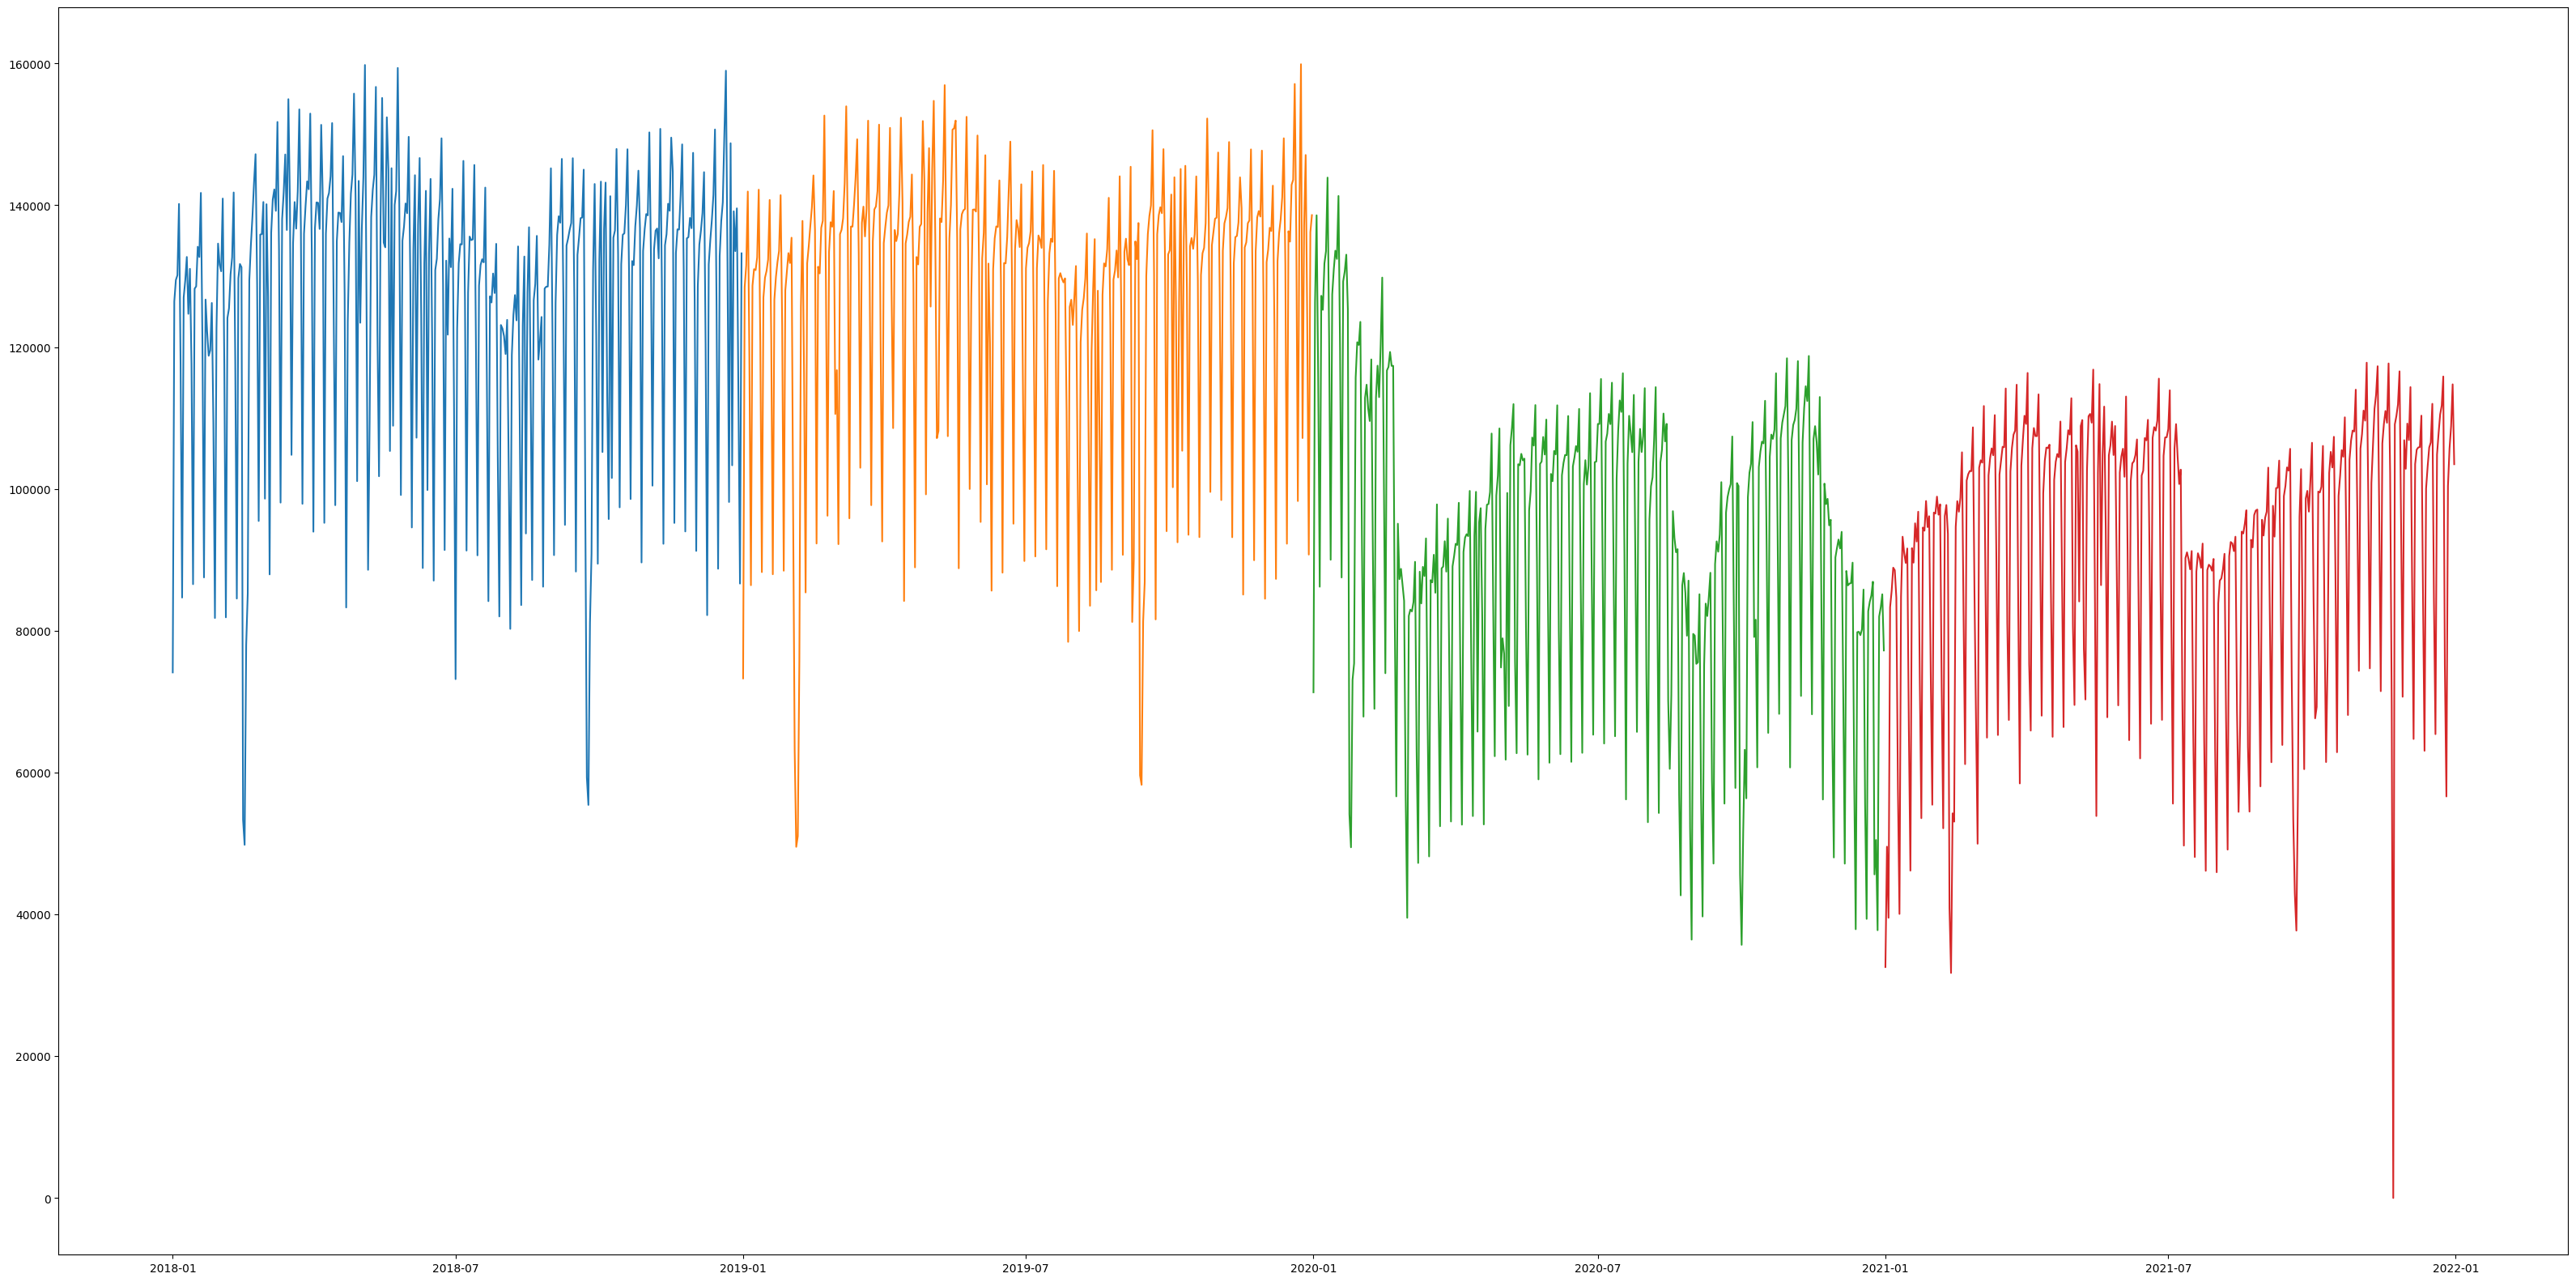

In [48]:
show_chart(gwang_data)

<ipython-input-47-f606c822b066>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2018'])
<ipython-input-47-f606c822b066>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2019'])
<ipython-input-47-f606c822b066>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2020'])
<ipython-input-47-f606c822b066>:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]

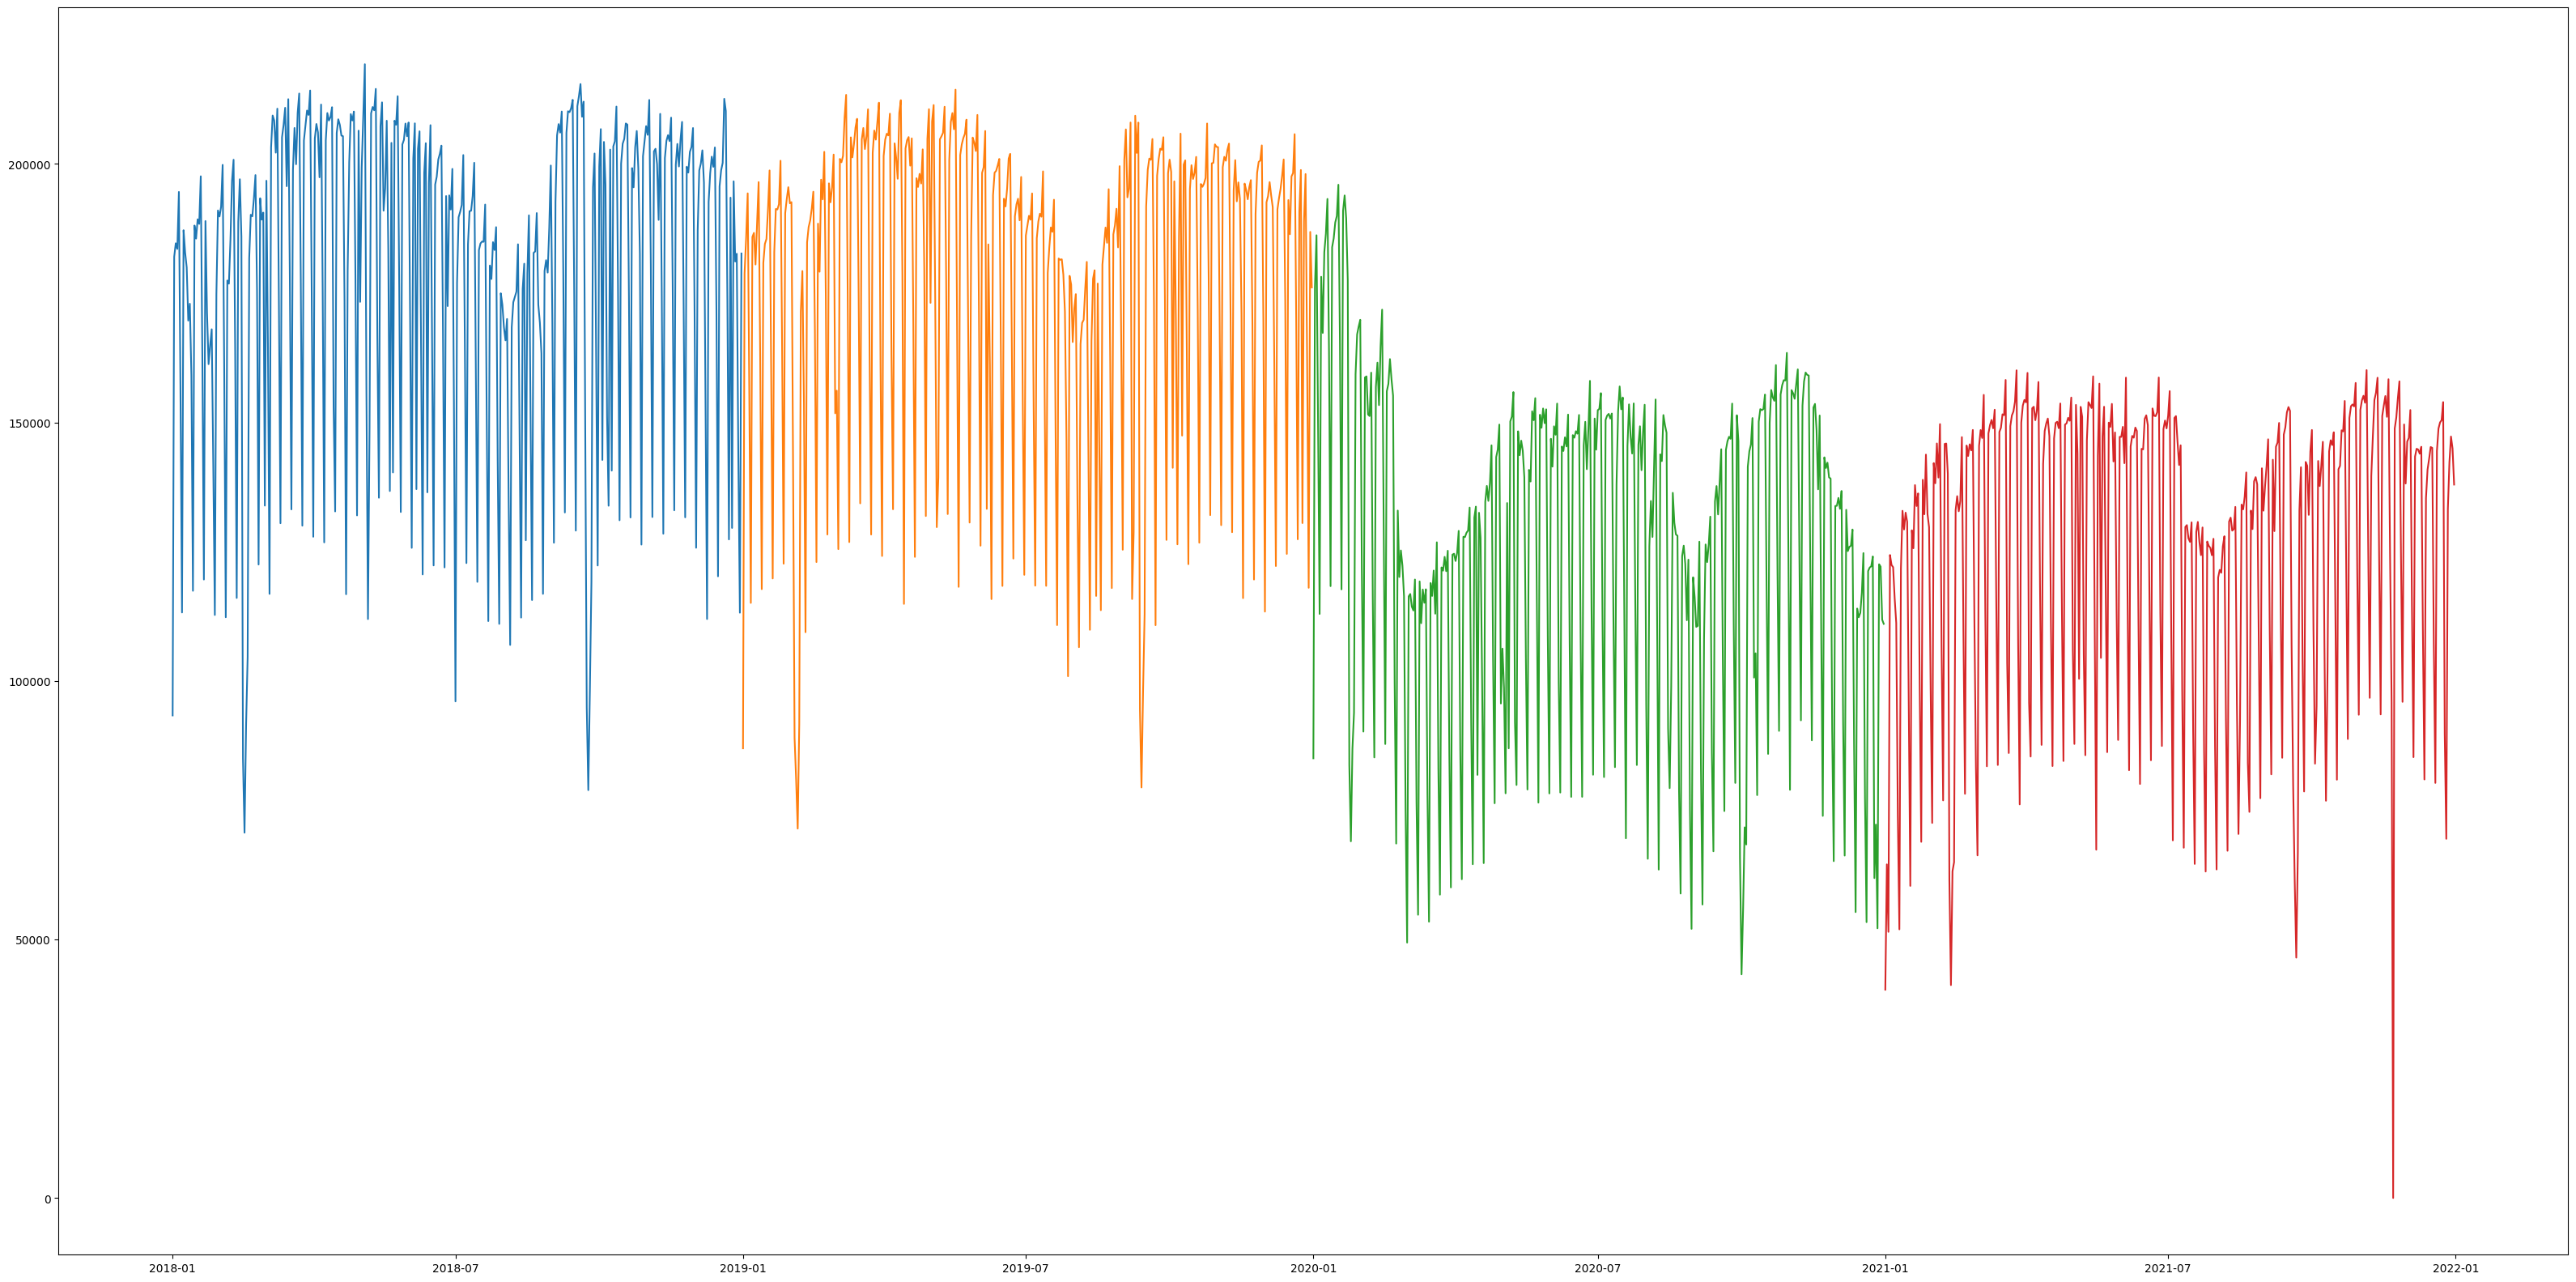

In [49]:
show_chart(dong_data)

<ipython-input-47-f606c822b066>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2018'])
<ipython-input-47-f606c822b066>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2019'])
<ipython-input-47-f606c822b066>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2020'])
<ipython-input-47-f606c822b066>:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]

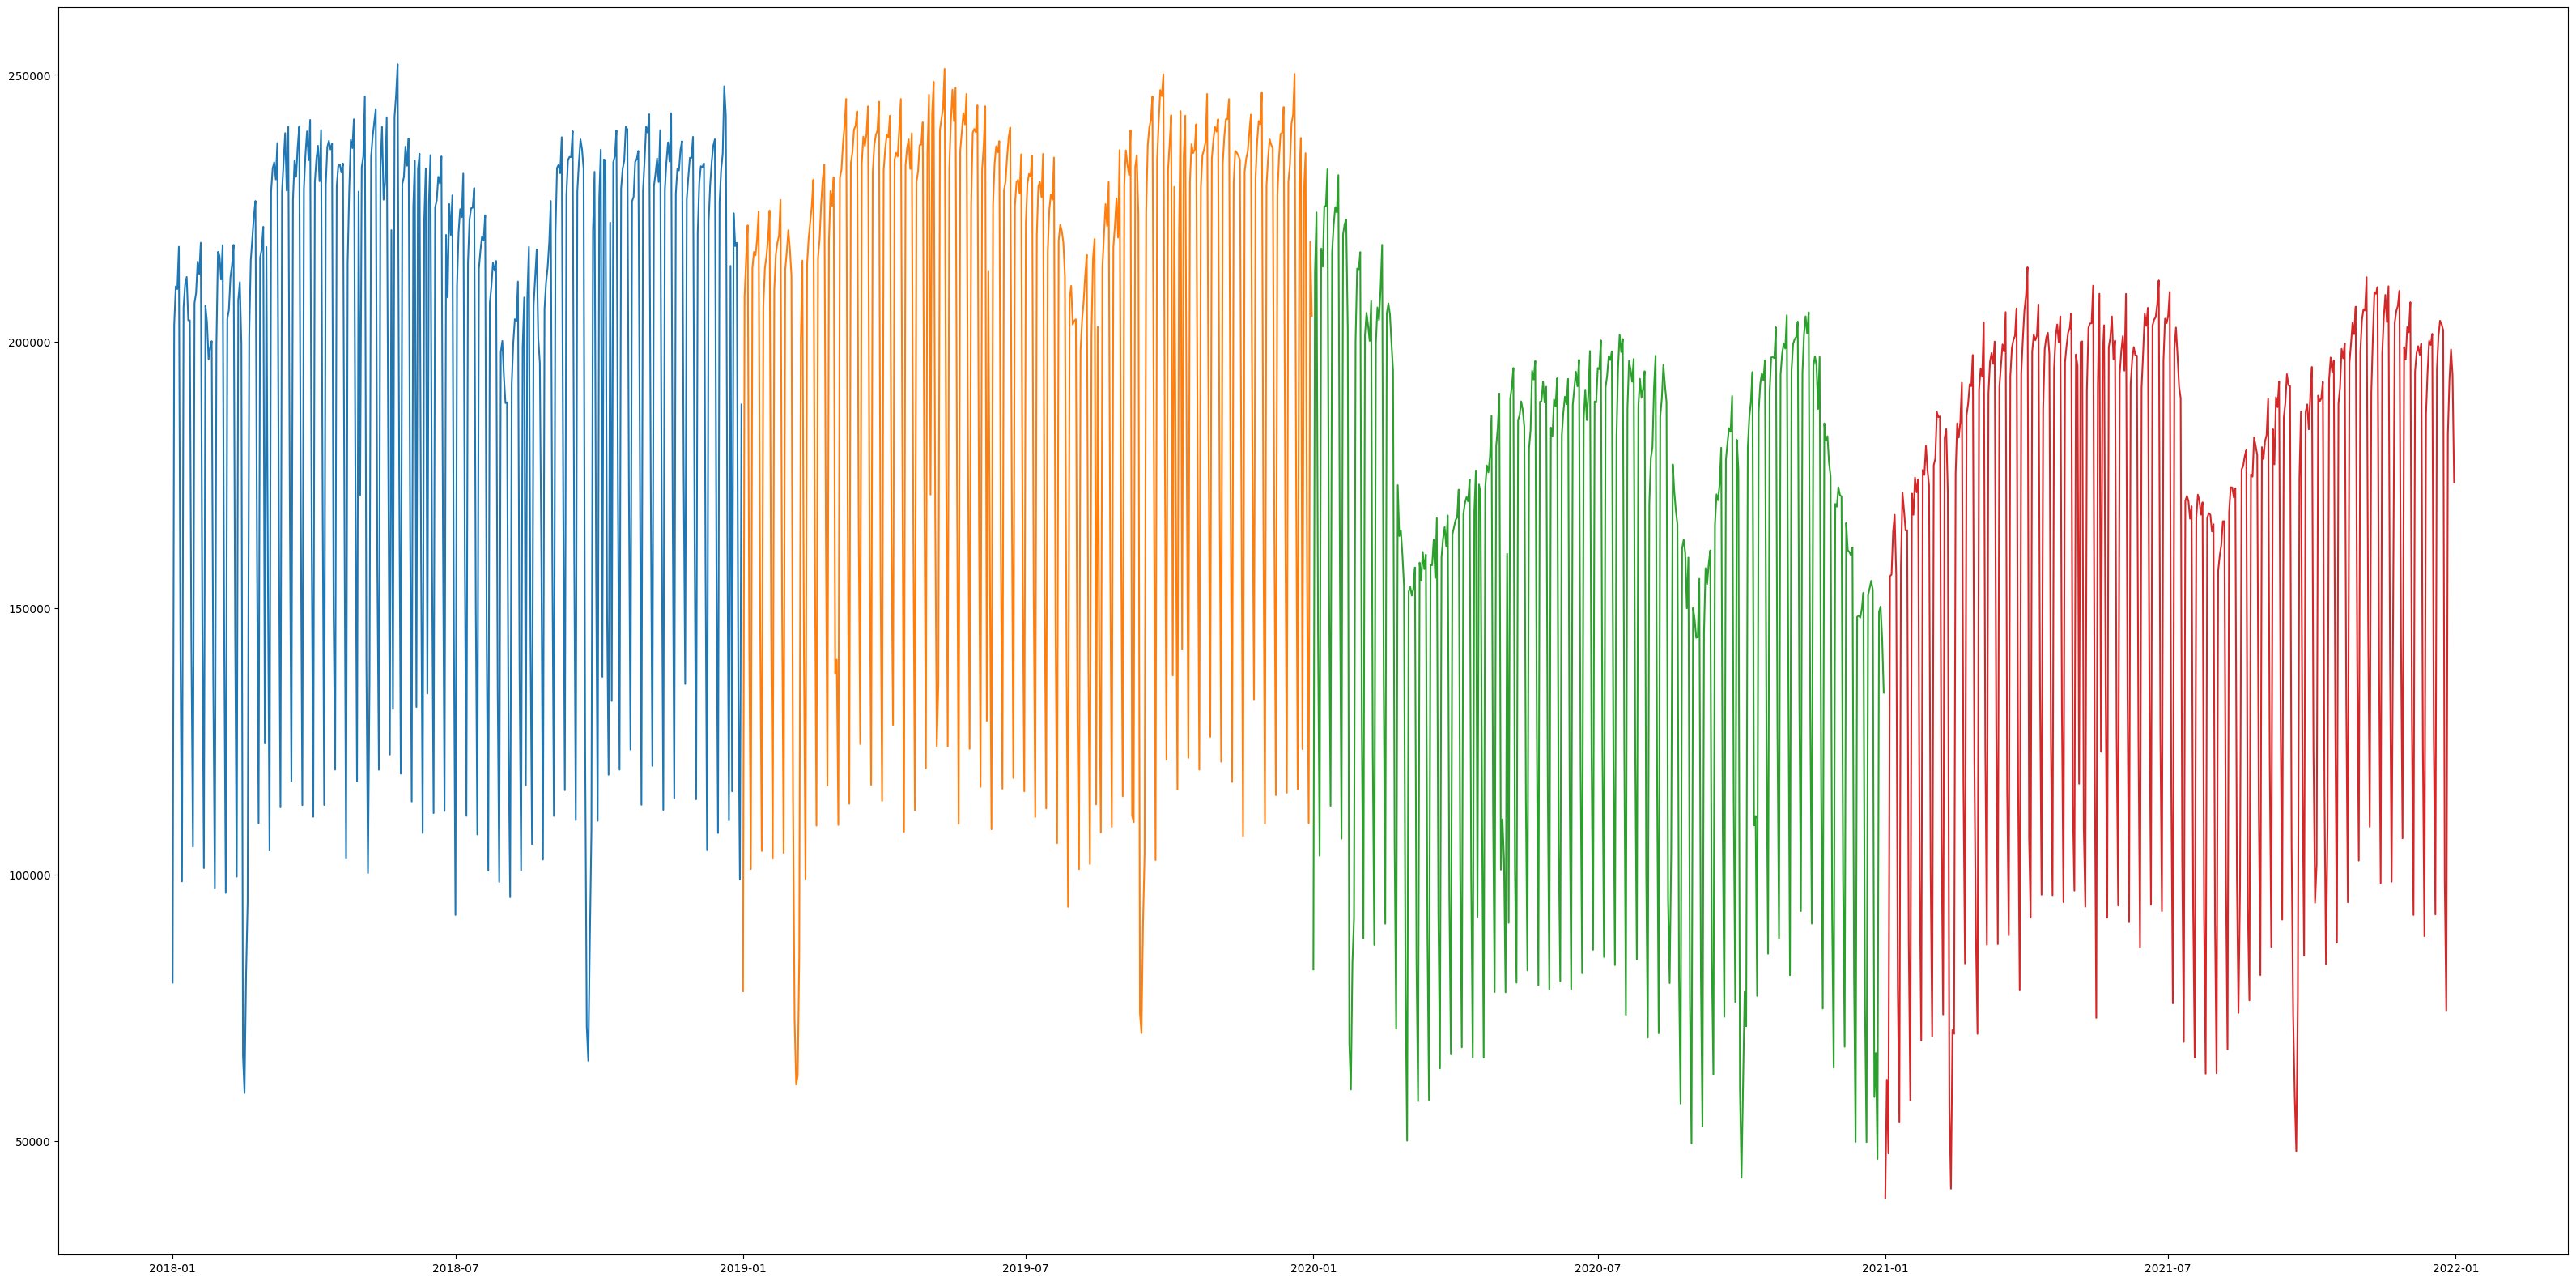

In [50]:
show_chart(sung_data)

<ipython-input-47-f606c822b066>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2018'])
<ipython-input-47-f606c822b066>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2019'])
<ipython-input-47-f606c822b066>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  chart.plot(show_data['2020'])
<ipython-input-47-f606c822b066>:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]

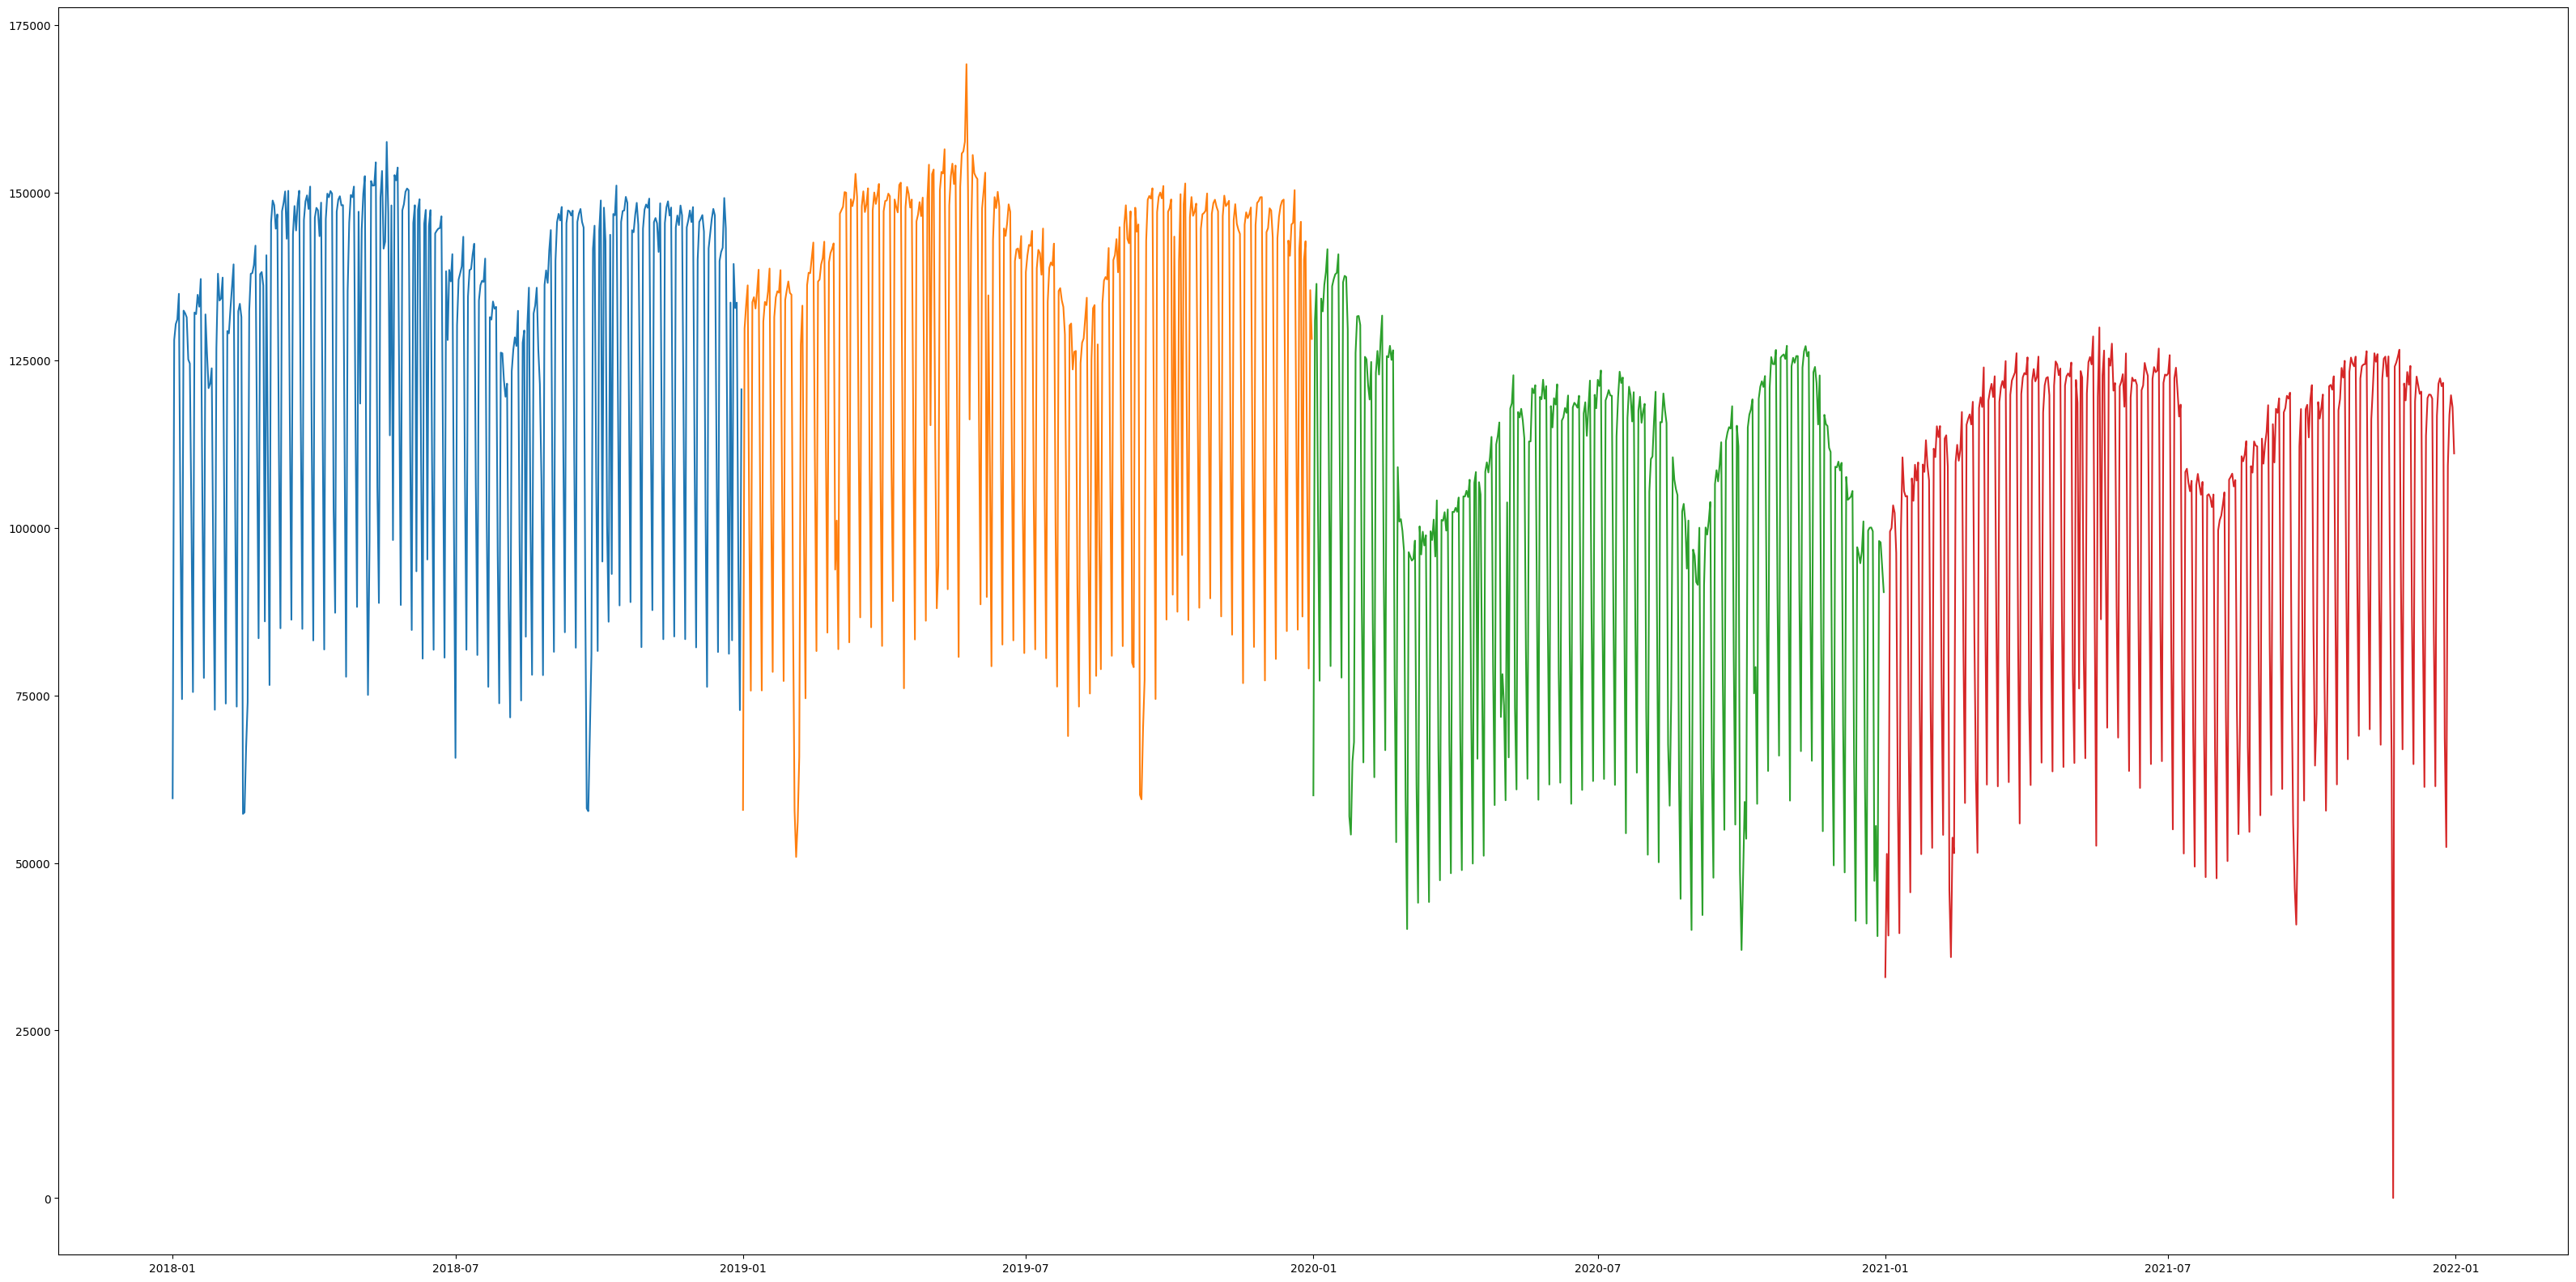

In [51]:
show_chart(jung_data)

# 따릉이 데이터 구별로 나누기

In [52]:
import math
import copy
import matplotlib.pyplot as plt

In [53]:
def my_dates(x):
  st_date = str(x)
  new = st_date[0:4] + '-' + st_date[4:6] + '-' + st_date[6:]
  return new

In [54]:
def zero(x):
  if x == 0:
    return 1.0
  else:
    return x

In [55]:
#데이터 행정구별로 나누기
bike_data = pd.read_csv('/content/drive/MyDrive/UOS COMP/train.csv')
bike_data[['일시']] = pd.DataFrame(bike_data['일시'].apply(my_dates))

gwang_bike_data = bike_data[['일시', '광진구']]
gwang_bike_data = gwang_bike_data.rename(columns = {'일시':'ds', '광진구':'y'})
gwang_bike_data[['y']] = pd.DataFrame(gwang_bike_data['y'].apply(zero))


dong_bike_data = bike_data[['일시', '동대문구']]
dong_bike_data = dong_bike_data.rename(columns = {'일시':'ds', '동대문구':'y'})
dong_bike_data[['y']] = pd.DataFrame(dong_bike_data['y'].apply(zero))


sung_bike_data = bike_data[['일시', '성동구']]
sung_bike_data = sung_bike_data.rename(columns = {'일시':'ds', '성동구':'y'})
sung_bike_data[['y']] = pd.DataFrame(sung_bike_data['y'].apply(zero))


jung_bike_data = bike_data[['일시', '중랑구']]
jung_bike_data = jung_bike_data.rename(columns = {'일시':'ds', '중랑구':'y'})
jung_bike_data[['y']] = pd.DataFrame(jung_bike_data['y'].apply(zero))

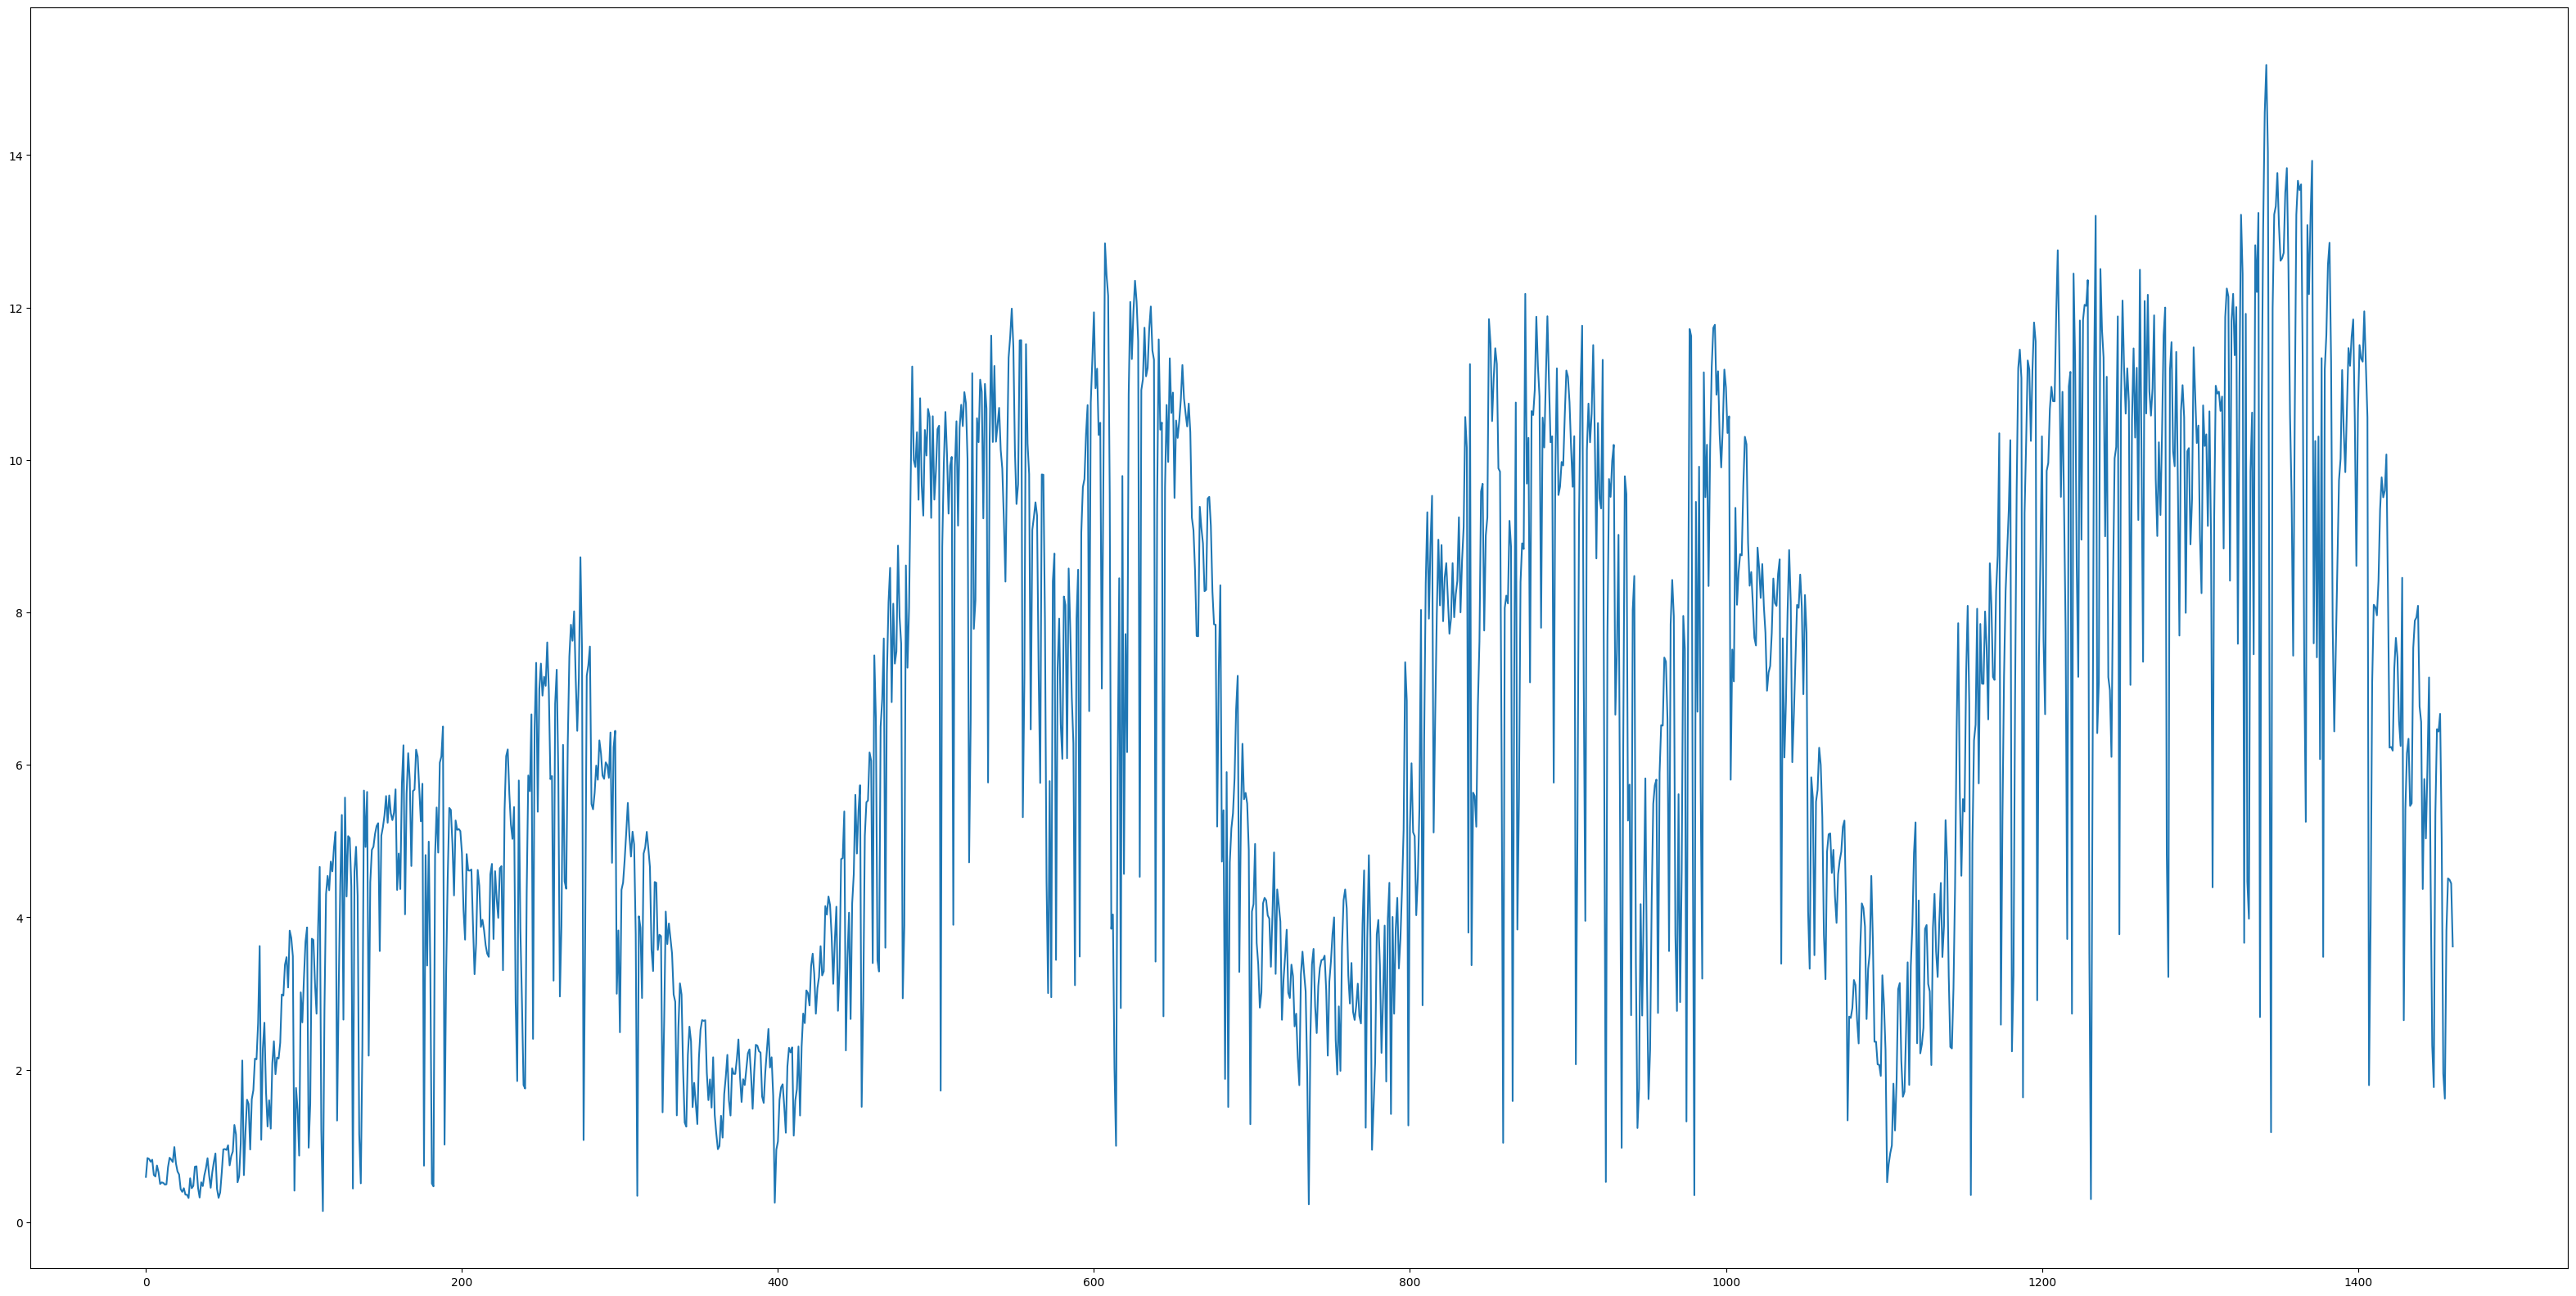

In [56]:
fig = plt.figure(figsize = (40, 20)) #plt.figure(figsize=(6,8))
chart = fig.add_subplot(1,1,1)
chart.plot(gwang_bike_data['y'])

#Prophet

In [57]:
#!pip install prophet

In [58]:
import pandas as pd
from prophet import Prophet

In [59]:
submission = pd.read_csv('/content/drive/MyDrive/UOS COMP/sample_submission.csv')

In [60]:
#Event
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-02-01']),
    'lower_window': -30,
    'upper_window': 30,
})

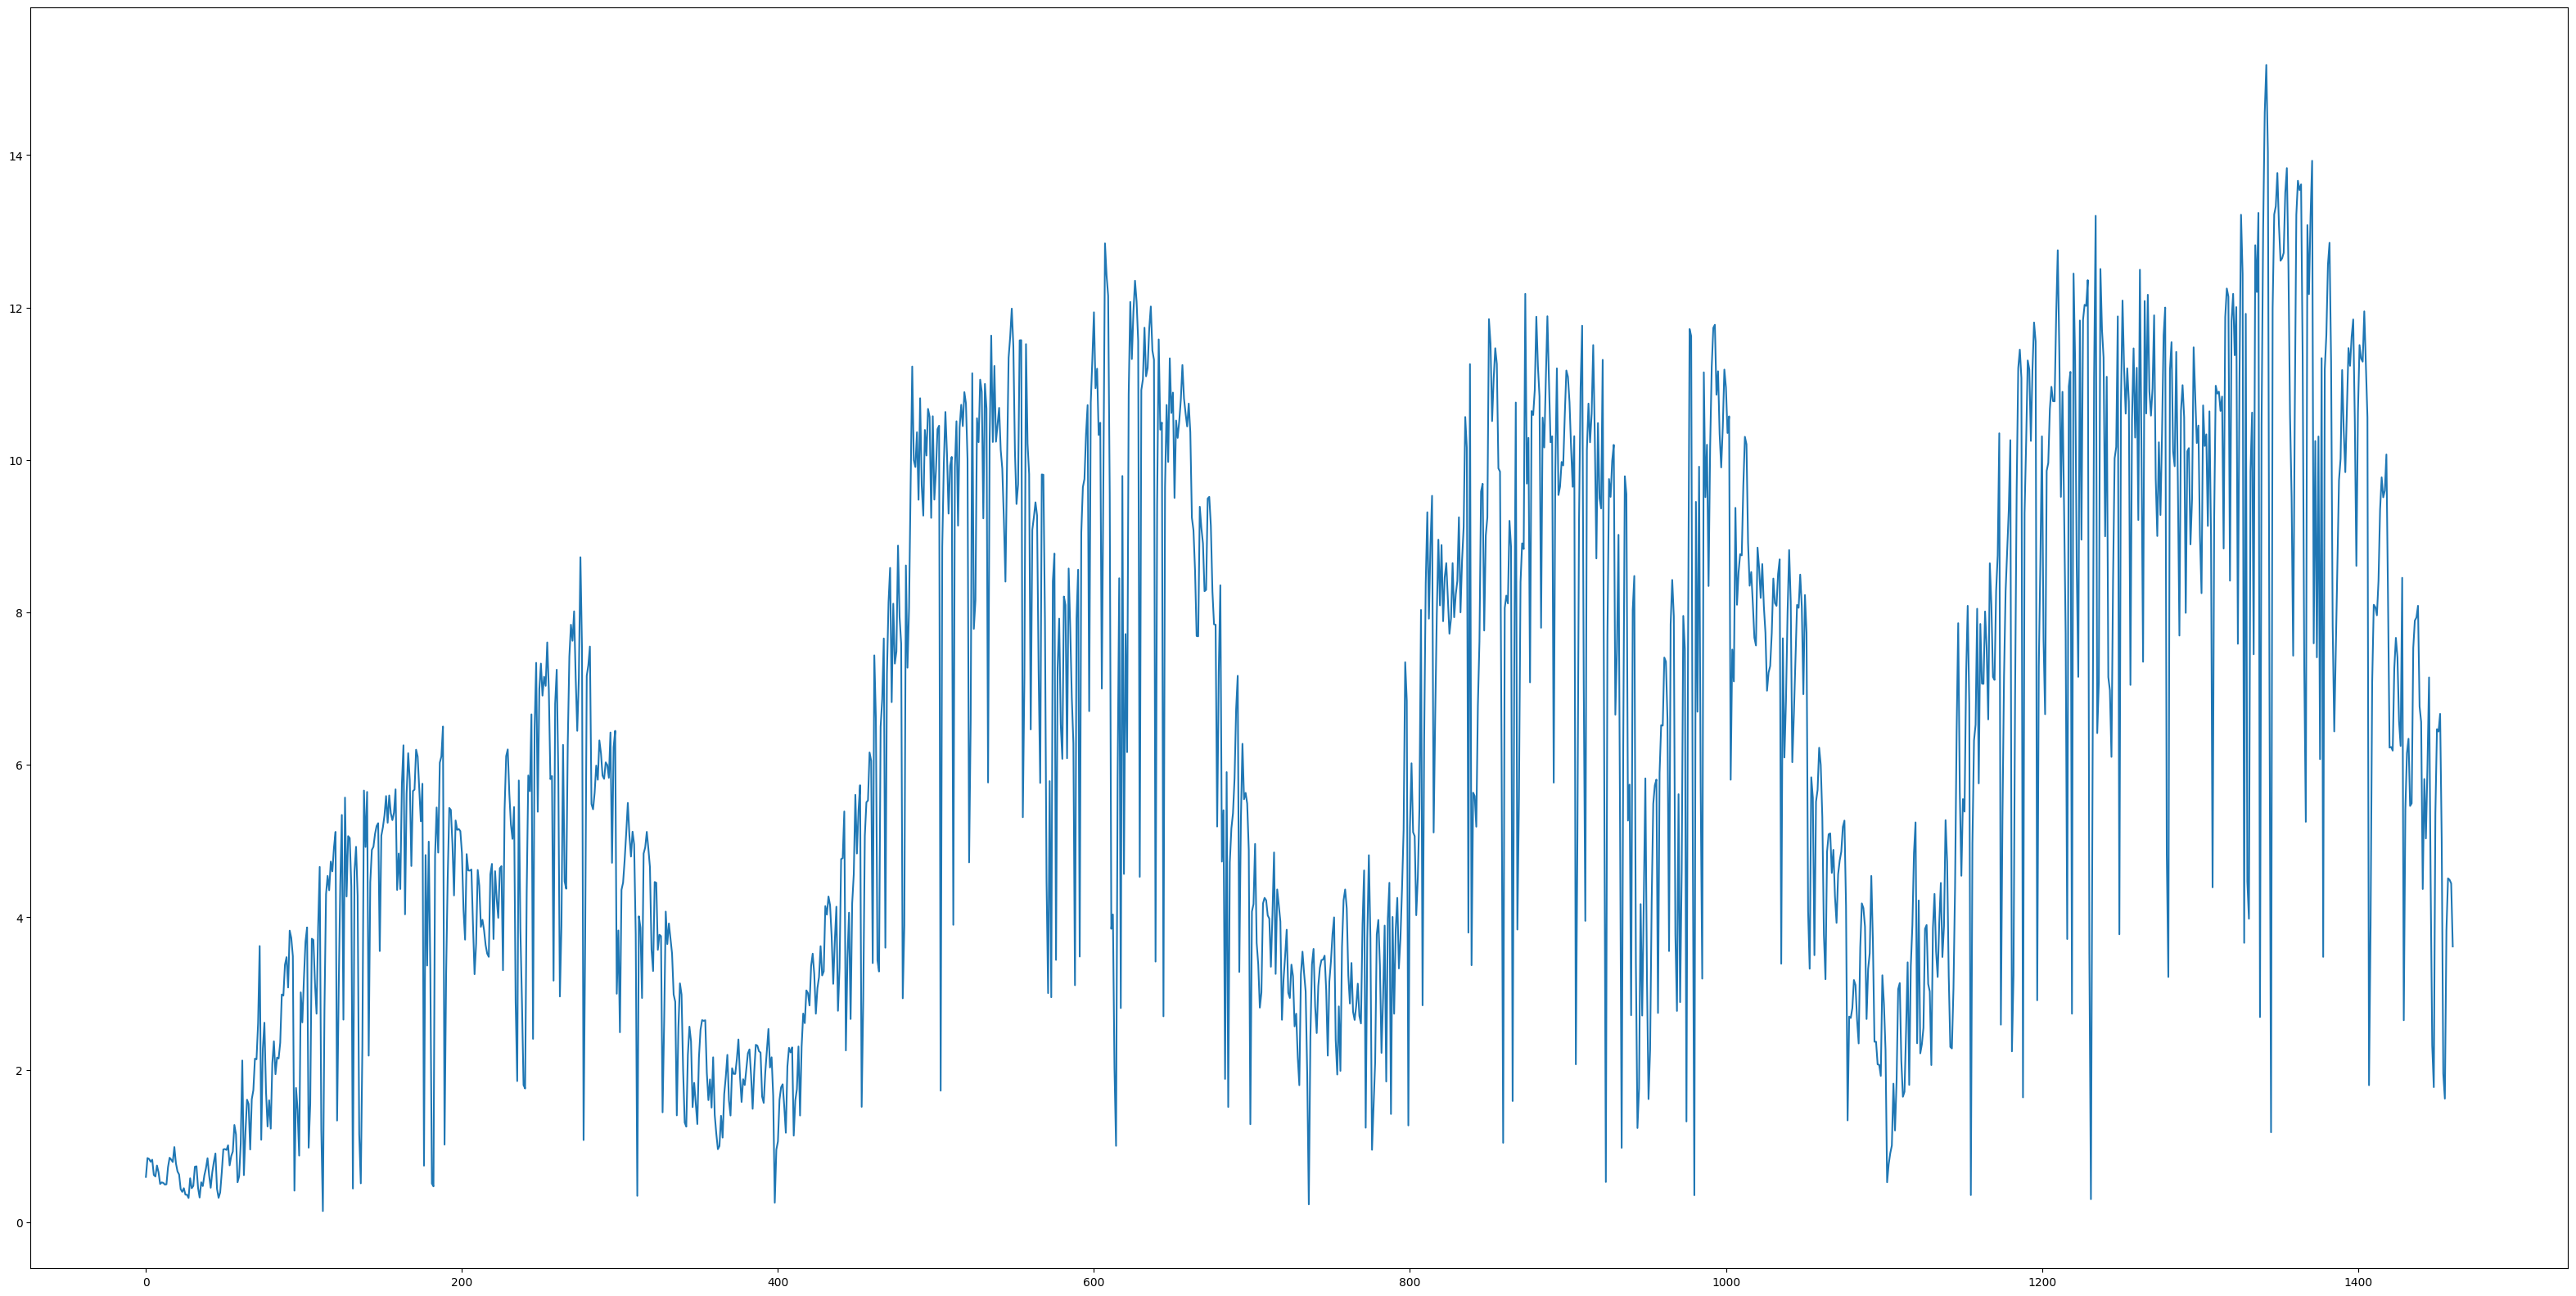

In [61]:
fig = plt.figure(figsize = (40, 20)) #plt.figure(figsize=(6,8))
chart = fig.add_subplot(1, 1, 1)
chart.plot(gwang_bike_data['y'])


## 광진구 학습

In [62]:
m = Prophet(changepoint_prior_scale=0.6,
            changepoints = None,
            n_changepoints = 25,
            changepoint_range = 0.8,
            seasonality_prior_scale = 0.7,
            weekly_seasonality=True,
            yearly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative',
            holidays=COVID,
            holidays_prior_scale = 0.3)
m.add_seasonality(name='train_off', period=120, fourier_order=5)
m.add_country_holidays("KR")

m.fit(gwang_bike_data)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpukkqtt0r/2z6gapr8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpukkqtt0r/__p6qx_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66536', 'data', 'file=/tmp/tmpukkqtt0r/2z6gapr8.json', 'init=/tmp/tmpukkqtt0r/__p6qx_y.json', 'output', 'file=/tmp/tmpukkqtt0r/prophet_modelct90o81j/prophet_model-20231007070111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


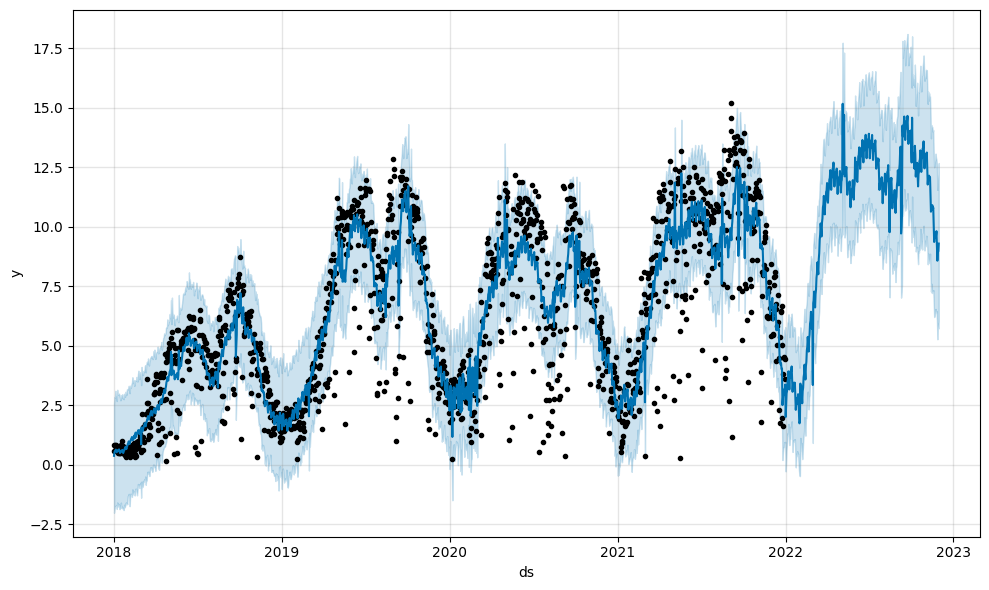

In [63]:
future = m.make_future_dataframe(periods=334)
gwang_forecast = m.predict(future)
fig1 = m.plot(gwang_forecast)

In [64]:
gwang_forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2018-01-01   1.190155   -2.017608    2.569524     1.190155     1.190155   
1    2018-01-02   1.203959   -1.859748    2.844109     1.203959     1.203959   
2    2018-01-03   1.217763   -1.739412    2.825767     1.217763     1.217763   
3    2018-01-04   1.231567   -1.760288    3.107532     1.231567     1.231567   
4    2018-01-05   1.245371   -1.706978    2.880279     1.245371     1.245371   
...         ...        ...         ...         ...          ...          ...   
1790 2022-11-26  10.859805    6.082861   12.593121     8.495530    13.292407   
1791 2022-11-27  10.865273    5.271932   11.553238     8.491654    13.301875   
1792 2022-11-28  10.870740    5.922476   12.243543     8.487778    13.315617   
1793 2022-11-29  10.876207    5.720910   11.979328     8.483903    13.330524   
1794 2022-11-30  10.881675    6.037066   12.677637     8.480027    13.343946   

      Alternative holiday for Children's Day  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
1790                                     0.0   
1791                                     0.0   
1792                                     0.0   
1793                                     0.0   
1794                                     0.0   

      Alternative holiday for Children's Day_lower  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
1790                                           0.0   
1791                                           0.0   
1792                                           0.0   
1793                                           0.0   
1794                                           0.0   

      Alternative holiday for Children's Day_upper  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
1790                                           0.0   
1791                                           0.0   
1792                                           0.0   
1793                                           0.0   
1794                                           0.0   

      Alternative holiday for Chuseok  ...    weekly  weekly_lower  \
0                                 0.0  ... -0.014030     -0.014030   
1                                 0.0  ... -0.012230     -0.012230   
2                                 0.0  ...  0.020383      0.020383   
3                                 0.0  ...  0.019236      0.019236   
4                                 0.0  ...  0.045251      0.045251   
...                               ...  ...       ...           ...   
1790                              0.0  ... -0.002568     -0.002568   
1791                              0.0  ... -0.056043     -0.056043   
1792                              0.0  ... -0.014030     -0.014030   
1793                              0.0  ... -0.012230     -0.012230   
1794                              0.0  ...  0.020383      0.020383   

      weekly_upper    yearly  yearly_lower  yearly_upper  additive_terms  \
0        -0.014030 -0.787136     -0.787136     -0.787136             0.0   
1        -0.012230 -0.785457     -0.785457     -0.785457             0.0   
2         0.020383 -0.782928     -0.782928     -0.782928             0.0   
3         0.019236 -0.779716    

In [65]:
gwang_forecast = gwang_forecast[['yhat']][-334:]
gwang_forecast = gwang_forecast.reset_index()
gwang_forecast = gwang_forecast[['yhat']]

In [66]:
submission['광진구'] = gwang_forecast['yhat']
submission

일시       광진구  동대문구  성동구  중랑구
0    20220101  2.007214     0    0    0
1    20220102  2.540674     0    0    0
2    20220103  2.998192     0    0    0
3    20220104  3.105478     0    0    0
4    20220105  3.500883     0    0    0
..        ...       ...   ...  ...  ...
329  20221126  9.217481     0    0    0
330  20221127  8.573971     0    0    0
331  20221128  8.982714     0    0    0
332  20221129  8.966604     0    0    0
333  20221130  9.294197     0    0    0

[334 rows x 5 columns]

## 동대문구 학습

In [67]:
n = Prophet(changepoint_prior_scale=0.6,
            changepoints = None,
            n_changepoints = 25,
            changepoint_range = 0.8,
            seasonality_prior_scale = 0.7,
            weekly_seasonality=True,
            yearly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative',
            holidays=COVID,
            holidays_prior_scale = 0.3)
n.add_seasonality(name='train_off', period=120, fourier_order=5)
n.add_country_holidays('KR')
n.fit(dong_bike_data)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpukkqtt0r/3pk8h6zv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpukkqtt0r/0tkf82vs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81945', 'data', 'file=/tmp/tmpukkqtt0r/3pk8h6zv.json', 'init=/tmp/tmpukkqtt0r/0tkf82vs.json', 'output', 'file=/tmp/tmpukkqtt0r/prophet_model0y64460k/prophet_model-20231007070114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


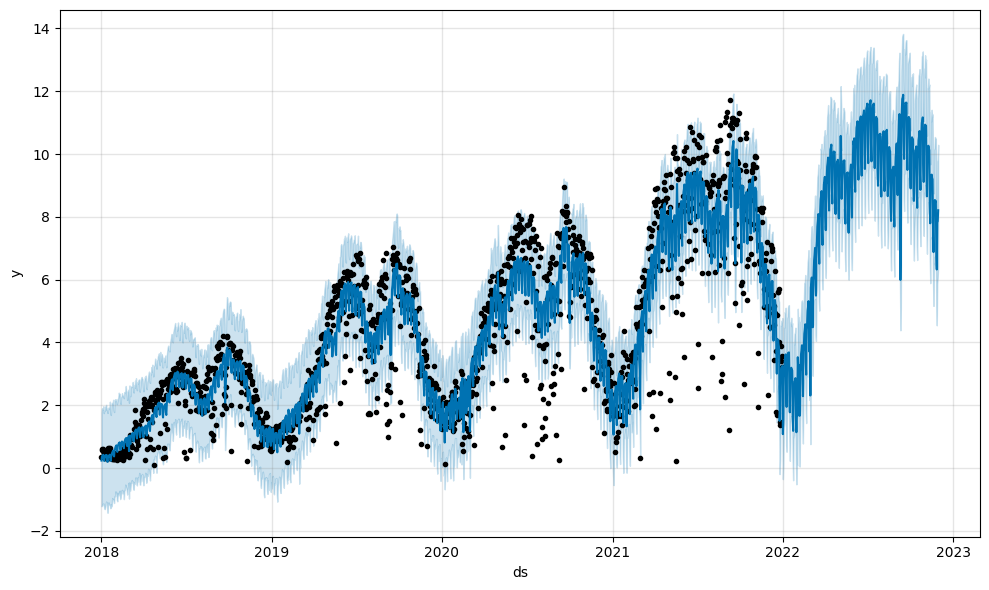

In [68]:
future = n.make_future_dataframe(periods=334)
dong_forecast = n.predict(future)
fig1 = n.plot(dong_forecast)

In [69]:
dong_forecast = dong_forecast[['yhat']][-334:]
dong_forecast = dong_forecast.reset_index()
dong_forecast = dong_forecast[['yhat']]

In [70]:
submission['동대문구'] = dong_forecast['yhat']
submission

일시       광진구      동대문구  성동구  중랑구
0    20220101  2.007214  1.081811    0    0
1    20220102  2.540674  1.544565    0    0
2    20220103  2.998192  2.906666    0    0
3    20220104  3.105478  3.007390    0    0
4    20220105  3.500883  3.392621    0    0
..        ...       ...       ...  ...  ...
329  20221126  9.217481  6.936936    0    0
330  20221127  8.573971  6.323439    0    0
331  20221128  8.982714  7.835871    0    0
332  20221129  8.966604  7.856007    0    0
333  20221130  9.294197  8.209701    0    0

[334 rows x 5 columns]

## 성동구 학습

In [71]:
o = Prophet(changepoint_prior_scale=0.6,
            changepoints = None,
            n_changepoints = 25,
            changepoint_range = 0.8,
            seasonality_prior_scale = 0.7,
            weekly_seasonality=True,
            yearly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative',
            holidays=COVID,
            holidays_prior_scale = 0.3)
o.add_seasonality(name='train_off', period=130, fourier_order=5)
o.add_country_holidays('KR')
o.fit(sung_bike_data)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpukkqtt0r/a3whk8al.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpukkqtt0r/5vy4k2v1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59545', 'data', 'file=/tmp/tmpukkqtt0r/a3whk8al.json', 'init=/tmp/tmpukkqtt0r/5vy4k2v1.json', 'output', 'file=/tmp/tmpukkqtt0r/prophet_modelxphn2d_z/prophet_model-20231007070116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


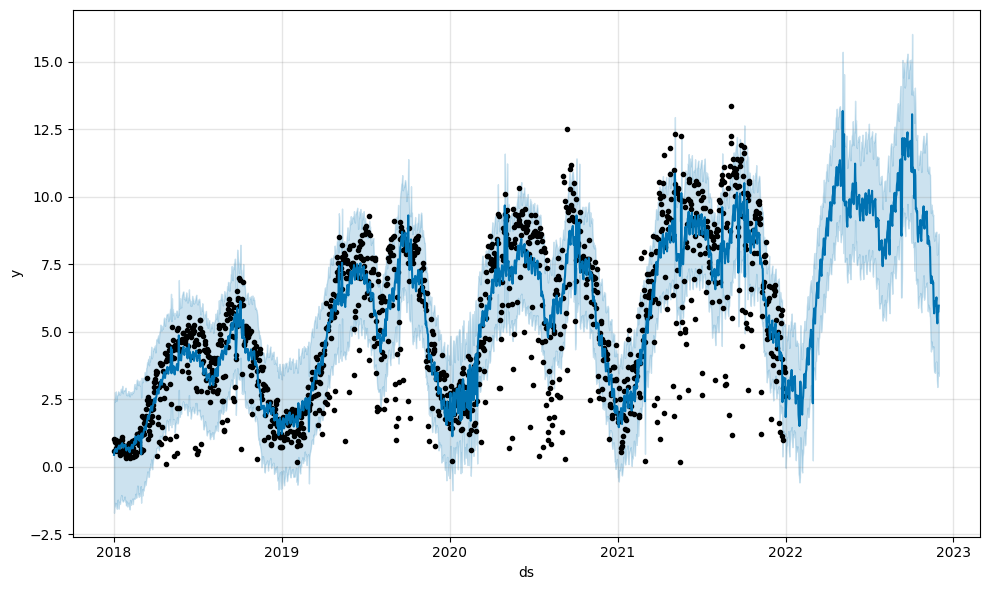

In [72]:
future = o.make_future_dataframe(periods=334)
sung_forecast = o.predict(future)
fig1 = o.plot(sung_forecast)

In [73]:
sung_forecast = sung_forecast[['yhat']][-334:]
sung_forecast = sung_forecast.reset_index()
sung_forecast = sung_forecast[['yhat']]

In [74]:
submission['성동구'] = sung_forecast['yhat']
submission

일시       광진구      동대문구       성동구  중랑구
0    20220101  2.007214  1.081811  1.849757    0
1    20220102  2.540674  1.544565  2.359412    0
2    20220103  2.998192  2.906666  2.748112    0
3    20220104  3.105478  3.007390  2.724783    0
4    20220105  3.500883  3.392621  2.957558    0
..        ...       ...       ...       ...  ...
329  20221126  9.217481  6.936936  5.546971    0
330  20221127  8.573971  6.323439  5.320053    0
331  20221128  8.982714  7.835871  5.771081    0
332  20221129  8.966604  7.856007  5.738941    0
333  20221130  9.294197  8.209701  5.975879    0

[334 rows x 5 columns]

## 중랑구 학습

In [75]:
p = Prophet(changepoint_prior_scale=0.6,
            changepoints = None,
            n_changepoints = 25,
            changepoint_range = 0.8,
            seasonality_prior_scale = 0.7,
            weekly_seasonality=True,
            yearly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative',
            holidays=COVID,
            holidays_prior_scale = 0.3)
p.add_seasonality(name='train_off', period=130, fourier_order=5)
p.add_country_holidays('KR')
p.fit(jung_bike_data)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpukkqtt0r/tcalhyvd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpukkqtt0r/mlq_6ksq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45866', 'data', 'file=/tmp/tmpukkqtt0r/tcalhyvd.json', 'init=/tmp/tmpukkqtt0r/mlq_6ksq.json', 'output', 'file=/tmp/tmpukkqtt0r/prophet_model9qeoqon_/prophet_model-20231007070118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


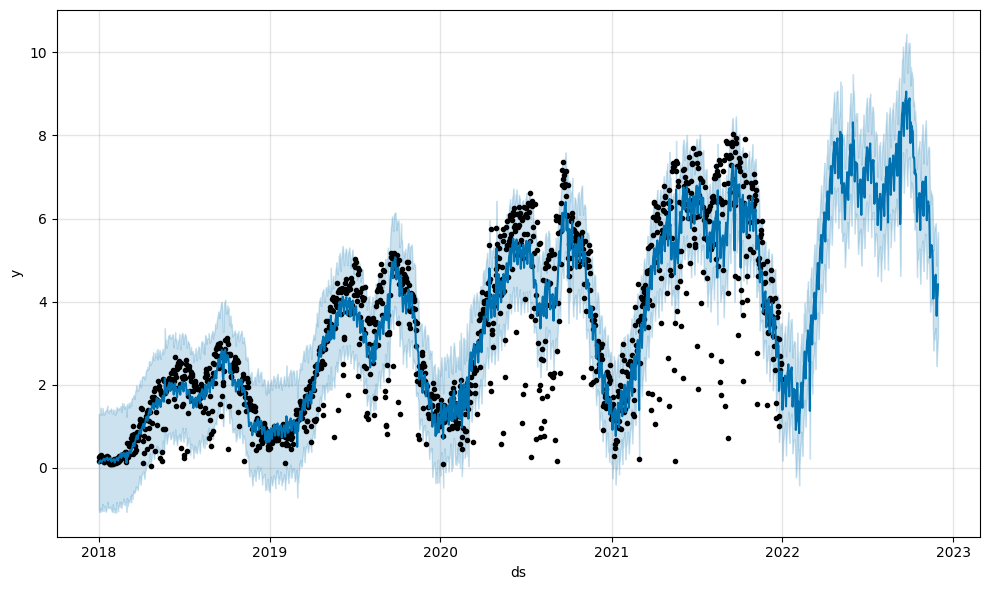

In [76]:
future = p.make_future_dataframe(periods=334)
jung_forecast = p.predict(future)
fig1 = p.plot(jung_forecast)

In [77]:
jung_forecast = jung_forecast[['yhat']][-334:]
jung_forecast = jung_forecast.reset_index()
jung_forecast = jung_forecast[['yhat']]

In [78]:
submission['중랑구'] = jung_forecast['yhat']
submission

일시       광진구      동대문구       성동구       중랑구
0    20220101  2.007214  1.081811  1.849757  1.398455
1    20220102  2.540674  1.544565  2.359412  1.418223
2    20220103  2.998192  2.906666  2.748112  1.761320
3    20220104  3.105478  3.007390  2.724783  1.838223
4    20220105  3.500883  3.392621  2.957558  2.046986
..        ...       ...       ...       ...       ...
329  20221126  9.217481  6.936936  5.546971  4.147762
330  20221127  8.573971  6.323439  5.320053  3.659489
331  20221128  8.982714  7.835871  5.771081  4.074549
332  20221129  8.966604  7.856007  5.738941  4.173511
333  20221130  9.294197  8.209701  5.975879  4.415870

[334 rows x 5 columns]

In [79]:
submission = submission.set_index('일시', drop=True, append=False, inplace=False, verify_integrity=False)

In [80]:
submission.to_csv('submission_prophet_data_cpscale0.6+event+cp.csv')